# TITLE : MODELS OF SATURATION PRESSURE FROM COMPOSITIONAL DATA MWC7+  TEMP USING MACHINE LEARNING ALGORITHM

OBJECTIVE : TRINING OF MODELS FOR FUTURE SELECTION FOR PREDICTION OF SATURATION PRESSURE USING WIDE RANGE OF COMPOSITION DATA AND THIS FILE SHOWS WORK WITH ONE LESS FEATURES (SGC7+) WHICH MULTICOLINEAR WITH MWC7+.

THIS FILE PREAPRED SEPRATED FROM TRAINING BECAUSE TO EDIT GRAPH AND DATA TABLE USED FOR PREDICTION NEED TO MANY TIME RE RUN THIS.

TO AVOID TRINING MULTIPAL TIMES THIS IS DONE IN SEPERATED FILES. HOWEVER REVIEWER CAN CROSS VERIFY SAME TRAINED MODELS USED FOR TESTING BY MATCHING HYPER PARAMETER OPTIMIZED DURING TRAINING USED HERE OR NOT. 

ALGORITHM APPLIED : LINEAR REGRESSION, SUPPORT VECTOR MACHINE, KNN, RANDOM FOREST, DECISION TREE, ANN , XGB

In [1]:
#DATA EXTRACTION, MANIPULATION, VIZULIZATION LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl




#STATISTICAL TOOLS LIBRARY
import scipy.stats as stat
import pylab 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#DATA FETURES OPERATION LIBRARY
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

#MODELING LIBRARY
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

#MODELLING OF DEEP LEARNING MODEL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch


#MODEL EVALUATION LIBRARY
from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score



#Model saving and loading files
import pickle
from keras.models import load_model


<ipython-input-1-e3400b26e064>:35: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [2]:
%matplotlib inline

In [3]:
#TRAIN AND TEST DATA ARE LOCATED AT SAME FOLDER AT WHICH RAW DATA WERE LOCATED
path = "C:\\STUDY DRIVE\\PSAT PAPER THESIS EDIT\\PSAT NEW\\MODEL 3\\DATASOURCE\\"

#FROM PREPROCESSING FILE TRAIN AND TEST DATA ARE EXPORTED 
train_file_name = "TRAIN.csv"
test_file_name = "TEST.csv"

#MODELS SAVED AT THIS LOCATION
model_path = "C:\\STUDY DRIVE\\PSAT PAPER THESIS EDIT\\PSAT NEW\\MODEL 3\\MODELS\\"

#READ FILES
train = pd.read_csv(path+train_file_name)
test = pd.read_csv(path+test_file_name)

#ENETER PATH WHERE DATA FORM THIS FILE WANTS TO EXPORTED
export_data_path = "C:\\STUDY DRIVE\\PSAT PAPER THESIS EDIT\\PSAT NEW\\MODEL 3\\EXPORTED DATA\\"

#ENETER PATH WHERE FIGURES WANTS TO EXPORTED
figure_path = "C:\\STUDY DRIVE\\PSAT PAPER THESIS EDIT\\PSAT NEW\\MODEL 3\\FIGURES\\"
tif_figure = "C:\\STUDY DRIVE\\PSAT PAPER THESIS EDIT\\PSAT NEW\\MODEL 3\\FIGURES\\PAPER\\"

In [4]:
X_train = train.drop("Psat",axis = 1)
y_train = train.Psat
X_test = test.drop("Psat",axis = 1)
y_test = test.Psat

                              #### Load Models For testing purpose  ####

In [5]:
#All File Name variable
scaler_file = 'scaler.sav'
svr_file    = 'svr_model.sav'
dt_file     = 'dt_model.sav'
rf_file     = 'rf_model.sav'
knn_file    = 'knn_model.sav'
xgb_file    = 'xgb_model.sav'

ann_file    = 'ann_model.h5'

In [6]:
scaler            = pickle.load(open(model_path+scaler_file , "rb"))
svr_regression    = pickle.load(open(model_path+svr_file , "rb"))
dt_regression     = pickle.load(open(model_path+dt_file , "rb"))
rf_regression     = pickle.load(open(model_path+rf_file , "rb"))
knn_regression    = pickle.load(open(model_path+knn_file , "rb"))
xgb_regression    = pickle.load(open(model_path+xgb_file , "rb"))

ann_regression    = load_model(model_path+ann_file)

#### Verify All Model Which Saved at given path on training route file to avoid missleading of manipulation 

In [7]:
svr_regression

SVR(C=5700, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0019,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [8]:
dt_regression

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=6, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [9]:
rf_regression

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=14, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=120, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [10]:
knn_regression

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [11]:
xgb_regression

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=90, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [12]:
ann_regression

                              #### First Scale All Inputs with scaler model  ####

In [13]:
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

## 1. SVR MODEL

In [14]:
svr_regression_test_Prediction = svr_regression.predict(x_test)
svr_regression_train_Prediction = svr_regression.predict(x_train)


In [15]:
svr_regression_trainR2 = svr_regression.score(x_train,y_train)
svr_regression_testR2 = svr_regression.score(x_test,y_test)
print(svr_regression_trainR2 , svr_regression_testR2)

0.9606559461638419 0.9473329851457096


In [16]:
result_svr_train = pd.DataFrame()
result_svr_train["Psat (train)"] = y_train
result_svr_train["Predicted Psat (train)"] = svr_regression_train_Prediction
result_svr_train["Residues"] = abs(result_svr_train["Psat (train)"] - result_svr_train["Predicted Psat (train)"])
result_svr_train["Absolute Error (%)"] = result_svr_train["Residues"]*100/result_svr_train["Psat (train)"]

result_svr_test = pd.DataFrame()
result_svr_test["Psat (test)"] = y_test
result_svr_test["Predicted Psat (test)"] = svr_regression_test_Prediction
result_svr_test["Residues"] = abs(result_svr_test["Psat (test)"] - result_svr_test["Predicted Psat (test)"])
result_svr_test["Absolute Error (%)"] = result_svr_test["Residues"]*100/result_svr_test["Psat (test)"]




In [17]:
result_svr_train.describe()

Psat (train)  Predicted Psat (train)    Residues  Absolute Error (%)
count    210.000000              210.000000  210.000000          210.000000
mean     145.241751              146.325857    9.608659            7.987822
std       78.207279               78.266287   12.160388           10.694969
min        5.442177                9.744505    0.082216            0.029549
25%       95.187075               95.758092    1.924294            1.320436
50%      118.673469              123.036470    6.126860            5.024848
75%      200.629252              197.426501   11.593091           10.190338
max      358.500000              399.644832   76.311499           79.055267

In [18]:
result_svr_test.describe()

Psat (test)  Predicted Psat (test)   Residues  Absolute Error (%)
count    91.000000              91.000000  91.000000           91.000000
mean    152.312915             155.644965  11.241067           10.156642
std      79.553047              79.753885  14.336927           19.412583
min      21.292517               3.266075   0.097483            0.084047
25%     103.746892             105.553738   2.307387            1.736459
50%     123.500000             130.333197   6.406590            5.133768
75%     195.748300             195.999341  15.068815            9.022062
max     354.114700             379.632675  76.603741          113.401309

<ipython-input-21-622c23dd46ff>:36: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_svr.savefig(figure_path + "Svr Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-21-622c23dd46ff>:36: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_svr.savefig(figure_path + "Svr Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-21-622c23dd46ff>:37: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_svr.savefig(tif_figure +

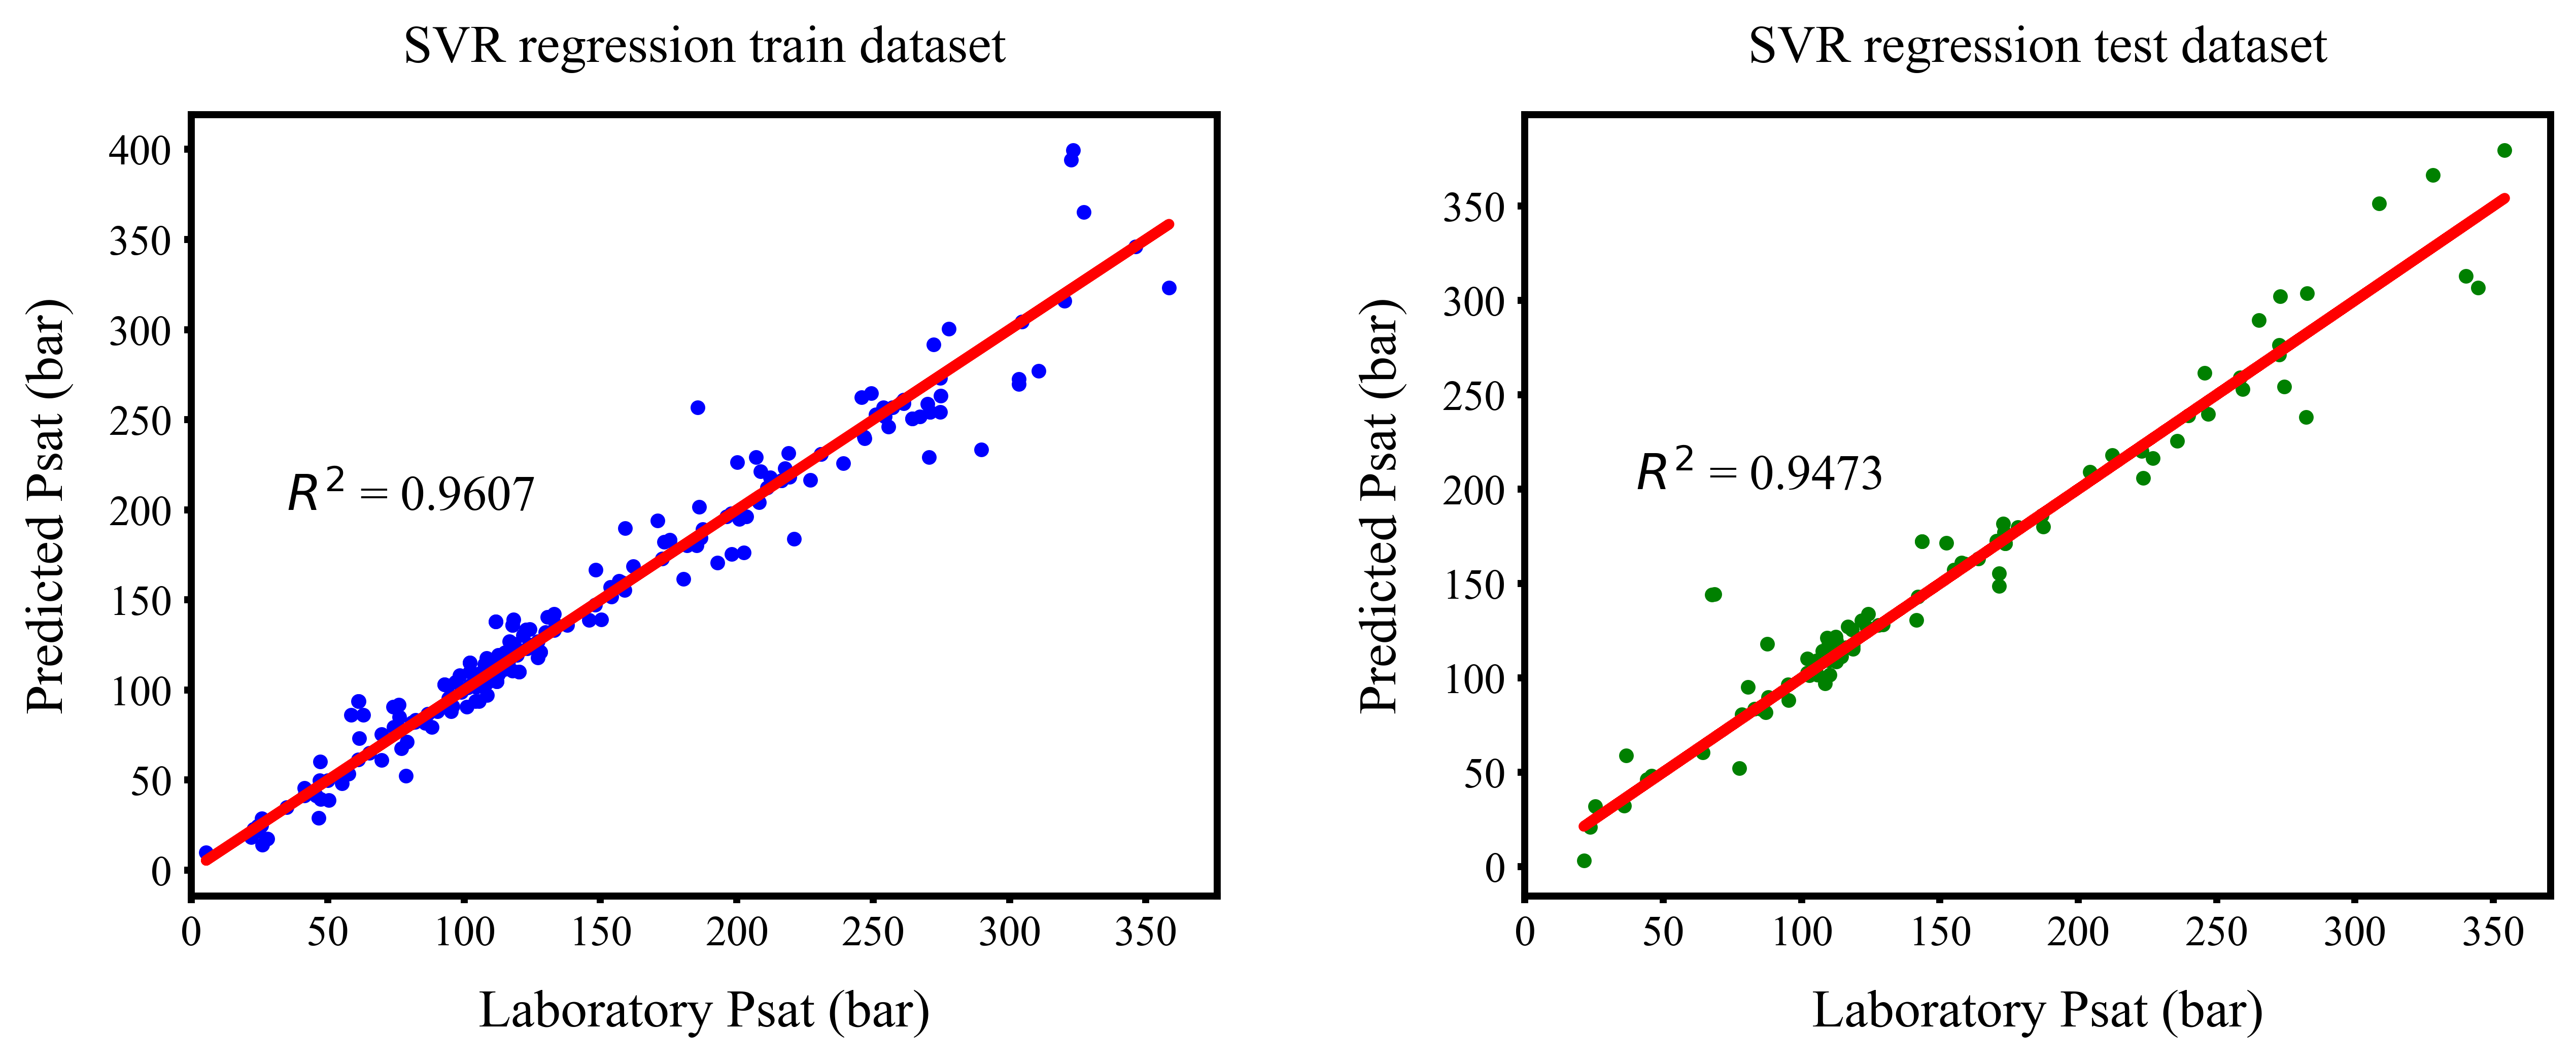

In [21]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"
fig_svr = plt.figure(figsize=(12,4) , dpi = 500)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.major.width'] = 2

ax1 = plt.subplot(121)
plt.scatter(y_train , svr_regression_train_Prediction , c = 'blue'  , s = 10 , label = "$R^2$ = {:.4f}".format(svr_regression_trainR2))
plt.plot(y_train,y_train, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Psat (bar)" , fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Psat (bar)", fontsize = 15 , labelpad = 10)
plt.title("SVR regression train dataset" , pad = 15 , fontsize = 15)
plt.text( 35,200 , "$R^2$ = {:.4f}".format(svr_regression_trainR2) , fontsize = 14)
plt.xlim((0,None))

ax2 = plt.subplot(122)
plt.scatter(y_test , svr_regression_test_Prediction , c = 'green'  , s = 10 , label = "$R^2$ = {:.4f}".format(svr_regression_testR2))
plt.plot(y_test,y_test, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Psat (bar)", fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Psat (bar)", fontsize = 15 , labelpad = 10)
plt.title("SVR regression test dataset" , pad = 15 , fontsize = 15)
plt.text( 40,200 , "$R^2$ = {:.4f}".format(svr_regression_testR2) , fontsize = 14)
plt.xlim((0,None))
for i in range(1,3,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)
        
plt.subplots_adjust(wspace=0.3,hspace=0.3)  
fig_svr.savefig(figure_path + "Svr Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
fig_svr.savefig(tif_figure + "Svr Result.tif" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

In [22]:
svr_MSE_train = mean_squared_error(y_train,svr_regression_train_Prediction)
svr_MAE_train = mean_absolute_error(y_train,svr_regression_train_Prediction)
svr_MSE_test  = mean_squared_error(y_test,svr_regression_test_Prediction)
svr_MAE_test  = mean_absolute_error(y_test,svr_regression_test_Prediction)
print(svr_MSE_train , svr_MAE_train , svr_MSE_test ,  svr_MAE_test )

239.49720252343585 9.608658733981457 329.65028274381905 11.241066776159535


## 2. Decision Tree Model 

In [23]:
dt_regression_test_Prediction = dt_regression.predict(x_test)
dt_regression_train_Prediction = dt_regression.predict(x_train)


In [24]:
dt_regression_trainR2 = dt_regression.score(x_train,y_train)
dt_regression_testR2 = dt_regression.score(x_test,y_test)
print(dt_regression_trainR2 , dt_regression_testR2)

0.9760090497244812 0.95447786405499


In [25]:
result_dt_train = pd.DataFrame()
result_dt_train["Psat (train)"] = y_train
result_dt_train["Predicted Psat (train)"] = dt_regression_train_Prediction
result_dt_train["Residues"] = abs(result_dt_train["Psat (train)"] - result_dt_train["Predicted Psat (train)"])
result_dt_train["Absolute Error (%)"] = result_dt_train["Residues"]*100/result_dt_train["Psat (train)"]

result_dt_test = pd.DataFrame()
result_dt_test["Psat (test)"] = y_test
result_dt_test["Predicted Psat (test)"] = dt_regression_test_Prediction
result_dt_test["Residues"] = abs(result_dt_test["Psat (test)"] - result_dt_test["Predicted Psat (test)"])
result_dt_test["Absolute Error (%)"] = result_dt_test["Residues"]*100/result_dt_test["Psat (test)"]




In [26]:
result_dt_train.describe()

Psat (train)  Predicted Psat (train)    Residues  Absolute Error (%)
count    210.000000              210.000000  210.000000          210.000000
mean     145.241751              144.475950    7.262473            7.683390
std       78.207279               77.013463    9.682038           26.546087
min        5.442177               25.578231    0.000000            0.000000
25%       95.187075               93.571428    1.316974            1.087819
50%      118.673469              119.115646    3.741497            3.179191
75%      200.629252              202.158164    9.543197            7.001815
max      358.500000              322.959183   68.333333          369.999983

In [27]:
result_dt_test.describe()

Psat (test)  Predicted Psat (test)   Residues  Absolute Error (%)
count    91.000000              91.000000  91.000000           91.000000
mean    152.312915             153.165307  11.143374            8.907655
std      79.553047              78.430890  12.749151           14.680240
min      21.292517              25.578231   0.000000            0.000000
25%     103.746892             104.183673   2.551021            2.025618
50%     123.500000             123.174122   5.925596            4.822074
75%     195.748300             216.326531  15.032653            9.488064
max     354.114700             322.959183  64.081633          121.601491

<ipython-input-28-92a0878363f8>:36: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_dt.savefig(figure_path + "Dt Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-28-92a0878363f8>:36: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_dt.savefig(figure_path + "Dt Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-28-92a0878363f8>:37: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_dt.savefig(tif_figure + "Dt 

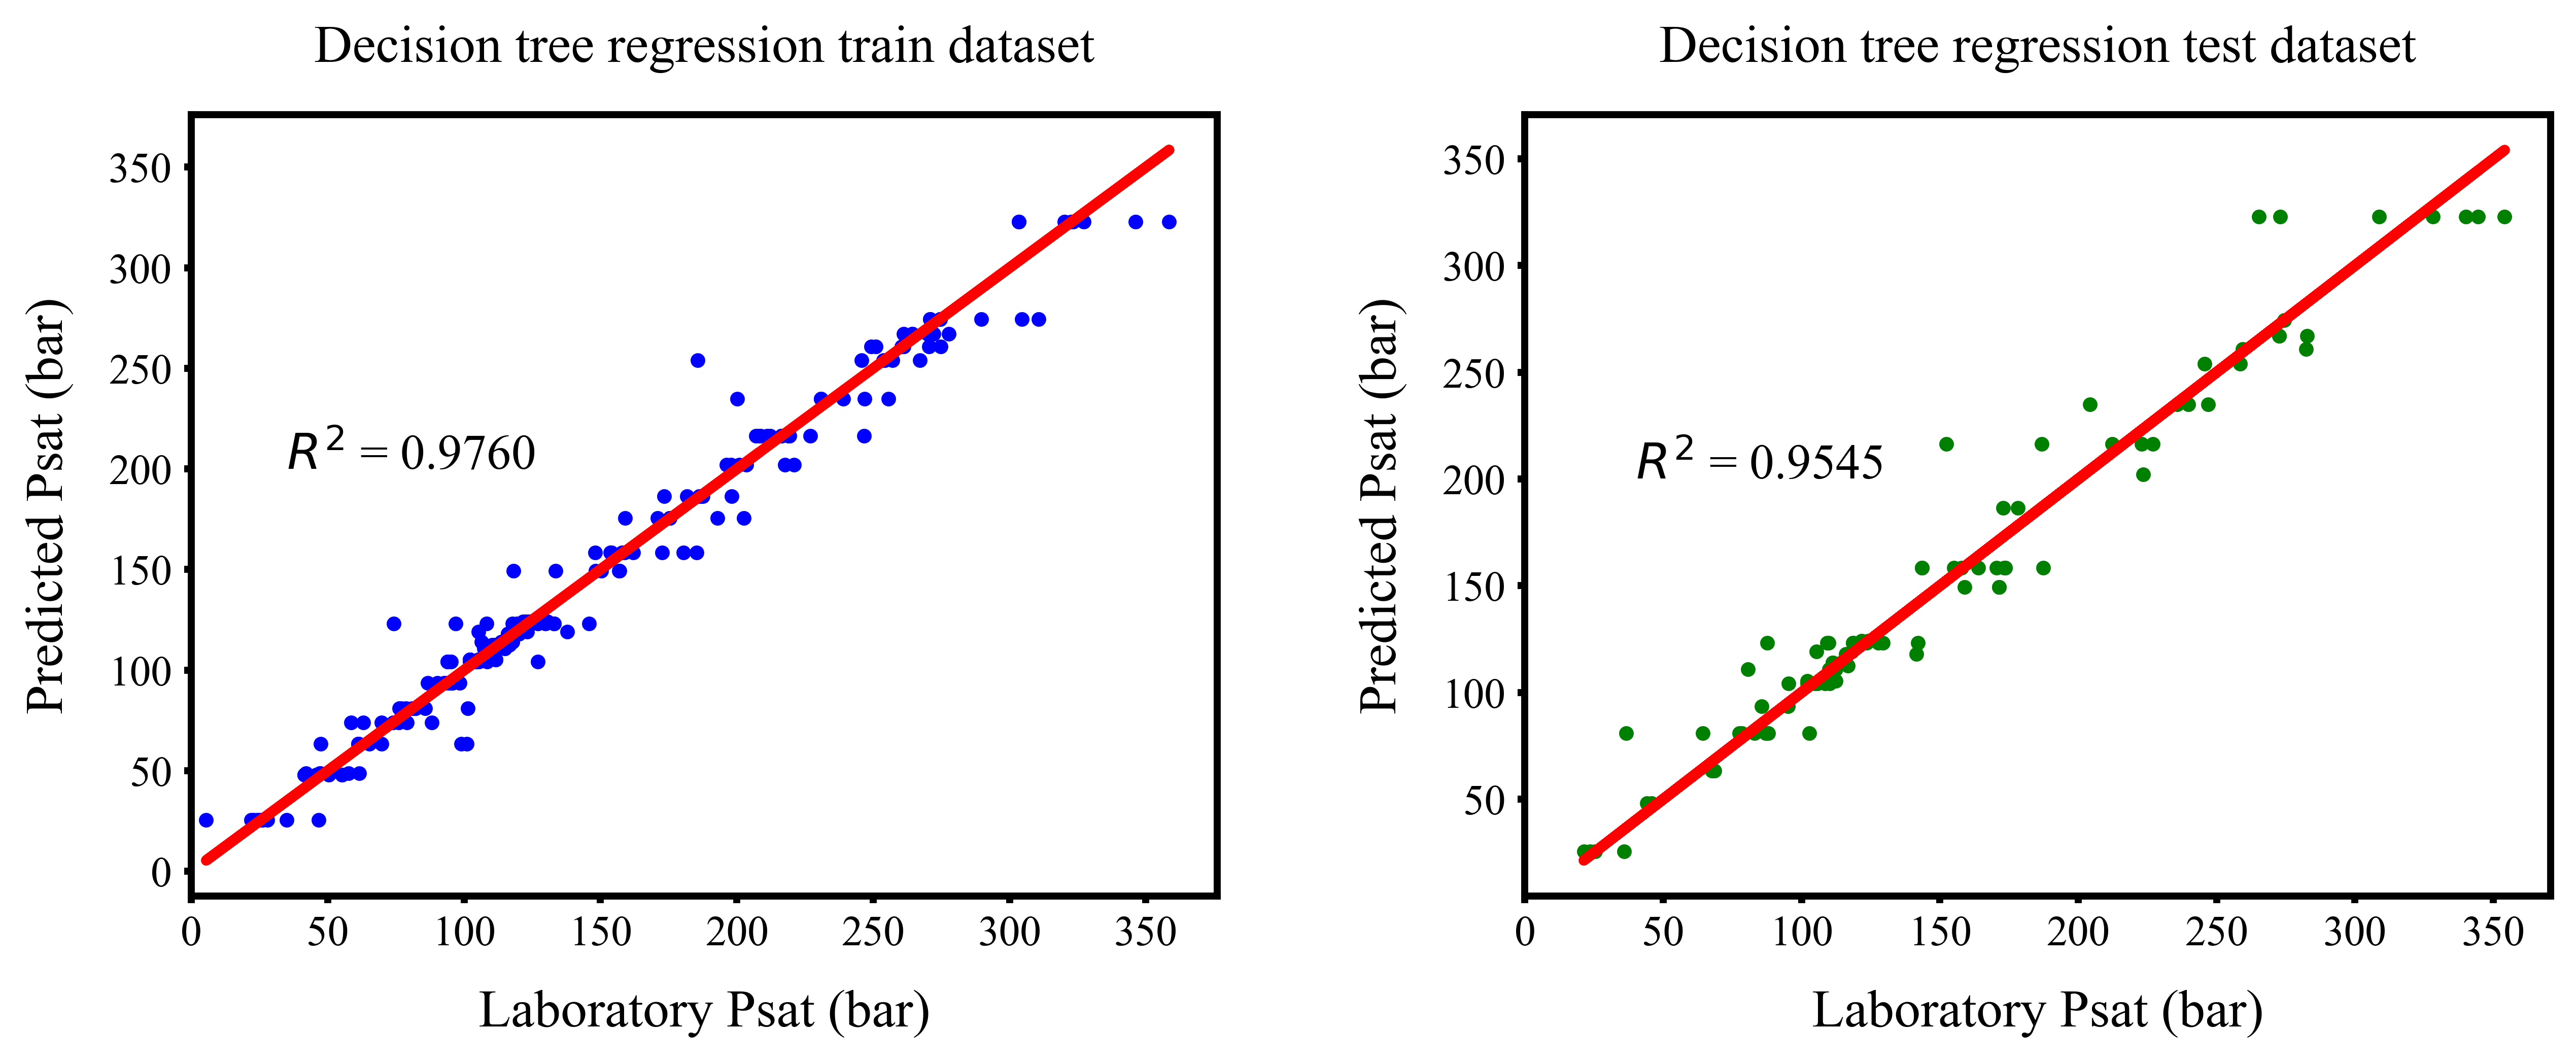

In [28]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"
fig_dt = plt.figure(figsize=(12,4) , dpi = 500)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.major.width'] = 2

ax1 = plt.subplot(121)
plt.scatter(y_train , dt_regression_train_Prediction , c = 'blue'  , s = 10 , label = "$R^2$ = {:.4f}".format(dt_regression_trainR2))
plt.plot(y_train,y_train, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Psat (bar)" , fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Psat (bar)", fontsize = 15 , labelpad = 10)
plt.title("Decision tree regression train dataset" , pad = 15 , fontsize = 15)
plt.text( 35,200 , "$R^2$ = {:.4f}".format(dt_regression_trainR2) , fontsize = 14)
plt.xlim((0,None))

ax2 = plt.subplot(122)
plt.scatter(y_test , dt_regression_test_Prediction , c = 'green'  , s = 10 , label = "$R^2$ = {:.4f}".format(dt_regression_testR2))
plt.plot(y_test,y_test, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Psat (bar)", fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Psat (bar)", fontsize = 15 , labelpad = 10)
plt.title("Decision tree regression test dataset" , pad = 15 , fontsize = 15)
plt.text( 40,200 , "$R^2$ = {:.4f}".format(dt_regression_testR2) , fontsize = 14)
plt.xlim((0,None))
for i in range(1,3,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)
        
plt.subplots_adjust(wspace=0.3,hspace=0.3)  
fig_dt.savefig(figure_path + "Dt Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
fig_dt.savefig(tif_figure + "Dt Result.tif" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

In [29]:
dt_MSE_train = mean_squared_error(y_train,dt_regression_train_Prediction)
dt_MAE_train = mean_absolute_error(y_train,dt_regression_train_Prediction)
dt_MSE_test  = mean_squared_error(y_test,dt_regression_test_Prediction)
dt_MAE_test  = mean_absolute_error(y_test,dt_regression_test_Prediction)
print(dt_MSE_train , dt_MAE_train , dt_MSE_test ,  dt_MAE_test )

146.03897963318434 7.262472919047617 284.92947676818426 11.143374340659339


## 3. Random forest Model 

In [30]:
rf_regression_test_Prediction = rf_regression.predict(x_test)
rf_regression_train_Prediction = rf_regression.predict(x_train)


In [31]:
rf_regression_trainR2 = rf_regression.score(x_train,y_train)
rf_regression_testR2 = rf_regression.score(x_test,y_test)
print(rf_regression_trainR2 , rf_regression_testR2)

0.9911837058454648 0.967636829810634


In [32]:
result_rf_train = pd.DataFrame()
result_rf_train["Psat (train)"] = y_train
result_rf_train["Predicted Psat (train)"] = rf_regression_train_Prediction
result_rf_train["Residues"] = abs(result_rf_train["Psat (train)"] - result_rf_train["Predicted Psat (train)"])
result_rf_train["Absolute Error (%)"] = result_rf_train["Residues"]*100/result_rf_train["Psat (train)"]

result_rf_test = pd.DataFrame()
result_rf_test["Psat (test)"] = y_test
result_rf_test["Predicted Psat (test)"] = rf_regression_test_Prediction
result_rf_test["Residues"] = abs(result_rf_test["Psat (test)"] - result_rf_test["Predicted Psat (test)"])
result_rf_test["Absolute Error (%)"] = result_rf_test["Residues"]*100/result_rf_test["Psat (test)"]




In [33]:
result_rf_train.describe()

Psat (train)  Predicted Psat (train)    Residues  Absolute Error (%)
count    210.000000              210.000000  210.000000          210.000000
mean     145.241751              145.218881    4.453499            5.373606
std       78.207279               76.869798    5.830544           22.478685
min        5.442177               22.501229    0.018382            0.014807
25%       95.187075               95.671546    0.874879            0.738502
50%      118.673469              118.646902    2.281814            1.797236
75%      200.629252              200.384555    5.778406            4.511063
max      358.500000              337.128484   46.844853          315.867599

In [34]:
result_rf_test.describe()

Psat (test)  Predicted Psat (test)   Residues  Absolute Error (%)
count    91.000000              91.000000  91.000000           91.000000
mean    152.312915             153.461014   8.977629            7.084228
std      79.553047              78.580490  11.105090           11.910174
min      21.292517              24.471652   0.018382            0.014807
25%     103.746892             102.604710   1.719510            1.575353
50%     123.500000             124.131278   4.857134            3.879232
75%     195.748300             204.490240  12.843037            6.946075
max     354.114700             328.682516  53.542736           96.760892

<ipython-input-35-5aaf627bbe3a>:36: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_rf.savefig(figure_path + "RF Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-35-5aaf627bbe3a>:36: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_rf.savefig(figure_path + "RF Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-35-5aaf627bbe3a>:37: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_rf.savefig(tif_figure + "RF 

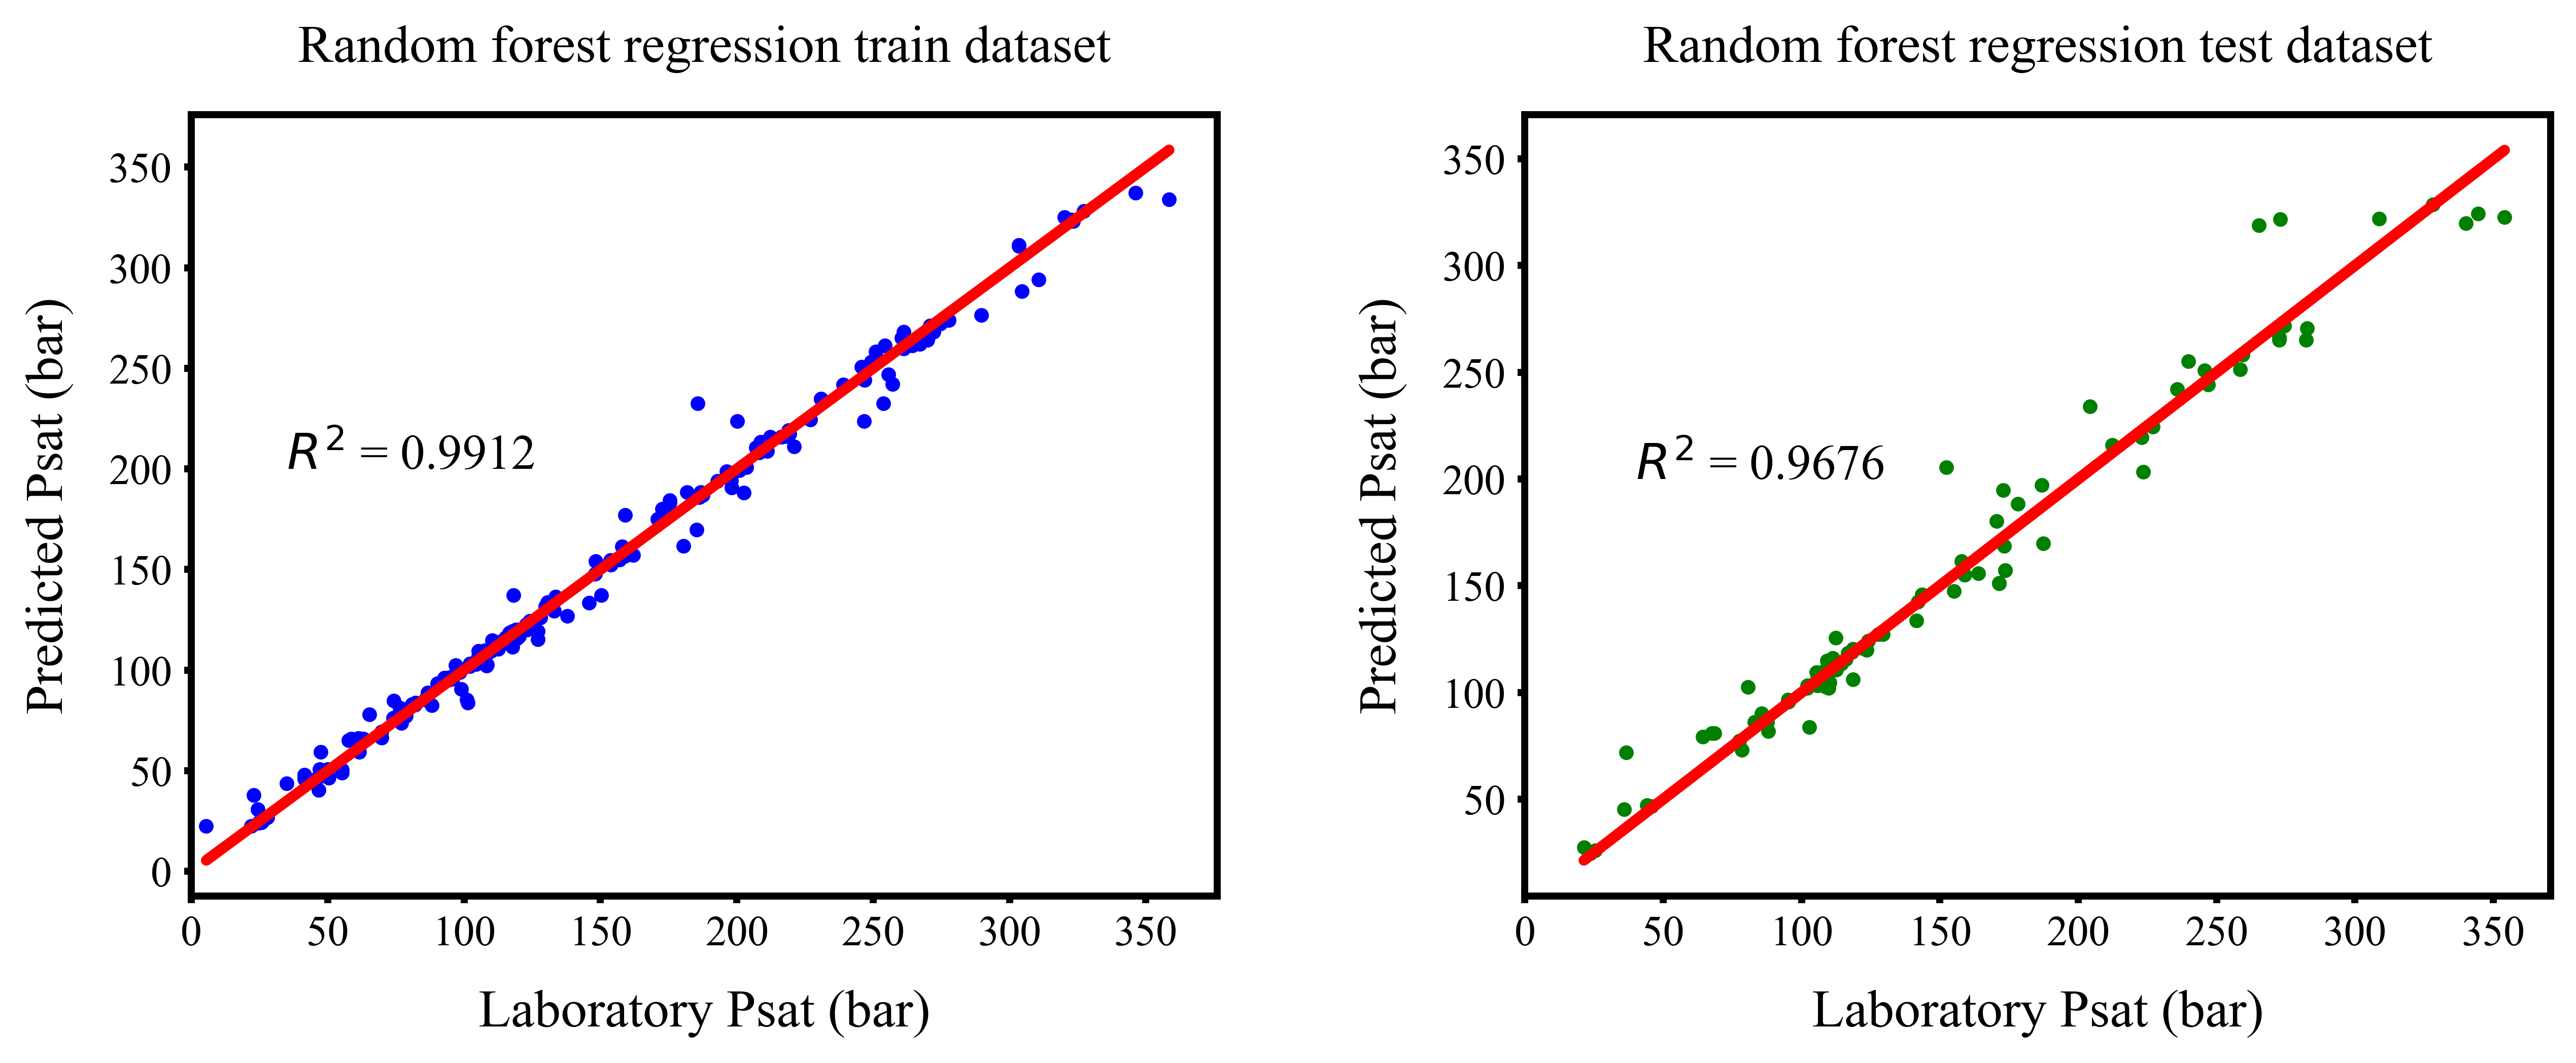

In [35]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"
fig_rf = plt.figure(figsize=(12,4) , dpi = 500)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.major.width'] = 2

ax1 = plt.subplot(121)
plt.scatter(y_train , rf_regression_train_Prediction , c = 'blue'  , s = 10 , label = "$R^2$ = {:.4f}".format(rf_regression_trainR2))
plt.plot(y_train,y_train, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Psat (bar)" , fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Psat (bar)", fontsize = 15 , labelpad = 10)
plt.title("Random forest regression train dataset" , pad = 15 , fontsize = 15)
plt.text( 35,200 , "$R^2$ = {:.4f}".format(rf_regression_trainR2) , fontsize = 14)
plt.xlim((0,None))

ax2 = plt.subplot(122)
plt.scatter(y_test , rf_regression_test_Prediction , c = 'green'  , s = 10 , label = "$R^2$ = {:.4f}".format(rf_regression_testR2))
plt.plot(y_test,y_test, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Psat (bar)", fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Psat (bar)", fontsize = 15 , labelpad = 10)
plt.title("Random forest regression test dataset" , pad = 15 , fontsize = 15)
plt.text( 40,200 , "$R^2$ = {:.4f}".format(rf_regression_testR2) , fontsize = 14)
plt.xlim((0,None))
for i in range(1,3,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)
        
plt.subplots_adjust(wspace=0.3,hspace=0.3)  
fig_rf.savefig(figure_path + "RF Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
fig_rf.savefig(tif_figure + "RF Result.tif" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

In [36]:
rf_MSE_train = mean_squared_error(y_train,rf_regression_train_Prediction)
rf_MAE_train = mean_absolute_error(y_train,rf_regression_train_Prediction)
rf_MSE_test  = mean_squared_error(y_test,rf_regression_test_Prediction)
rf_MAE_test  = mean_absolute_error(y_test,rf_regression_test_Prediction)
print(rf_MSE_train , rf_MAE_train , rf_MSE_test , rf_MAE_test )

53.667011422560186 4.4534988676050595 202.56565201059107 8.977629366858492


## 4. KNN Model

In [37]:
knn_regression_test_Prediction = knn_regression.predict(x_test)
knn_regression_train_Prediction =knn_regression.predict(x_train)


In [38]:
knn_regression_trainR2 = knn_regression.score(x_train,y_train)
knn_regression_testR2 = knn_regression.score(x_test,y_test)
print(knn_regression_trainR2 , knn_regression_testR2)

0.9752447191110544 0.7725757875688265


In [39]:
result_knn_train = pd.DataFrame()
result_knn_train["Psat (train)"] = y_train
result_knn_train["Predicted Psat (train)"] = knn_regression_train_Prediction
result_knn_train["Residues"] = abs(result_knn_train["Psat (train)"] - result_knn_train["Predicted Psat (train)"])
result_knn_train["Absolute Error (%)"] = result_knn_train["Residues"]*100/result_knn_train["Psat (train)"]

result_knn_test = pd.DataFrame()
result_knn_test["Psat (test)"] = y_test
result_knn_test["Predicted Psat (test)"] = knn_regression_test_Prediction
result_knn_test["Residues"] = abs(result_knn_test["Psat (test)"] - result_knn_test["Predicted Psat (test)"])
result_knn_test["Absolute Error (%)"] = result_knn_test["Residues"]*100/result_knn_test["Psat (test)"]




In [40]:
result_knn_train.describe()

Psat (train)  Predicted Psat (train)    Residues  Absolute Error (%)
count    210.000000              210.000000  210.000000          210.000000
mean     145.241751              146.274176    7.150309            8.724922
std       78.207279               76.410191   10.002056           29.138513
min        5.442177               25.027968    0.000000            0.000000
25%       95.187075               93.936225    0.142603            0.115783
50%      118.673469              118.112245    3.131293            2.410905
75%      200.629252              199.913266    9.692857            8.007861
max      358.500000              352.350000   56.832947          381.812490

In [41]:
result_knn_test.describe()

Psat (test)  Predicted Psat (test)    Residues  Absolute Error (%)
count    91.000000              91.000000   91.000000           91.000000
mean    152.312915             151.858396   22.066931           17.257524
std      79.553047              70.881012   30.772337           29.891190
min      21.292517              25.244898    0.000000            0.000000
25%     103.746892             106.972789    4.830953            3.890622
50%     123.500000             121.938776    9.795918            7.506255
75%     195.748300             199.593728   26.079038           19.079554
max     354.114700             324.897959  194.465040          230.039936

<ipython-input-42-2dc809e62f94>:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_knn.savefig(figure_path + "KNN Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-42-2dc809e62f94>:39: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_knn.savefig(figure_path + "KNN Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-42-2dc809e62f94>:40: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_knn.savefig(tif_figure +

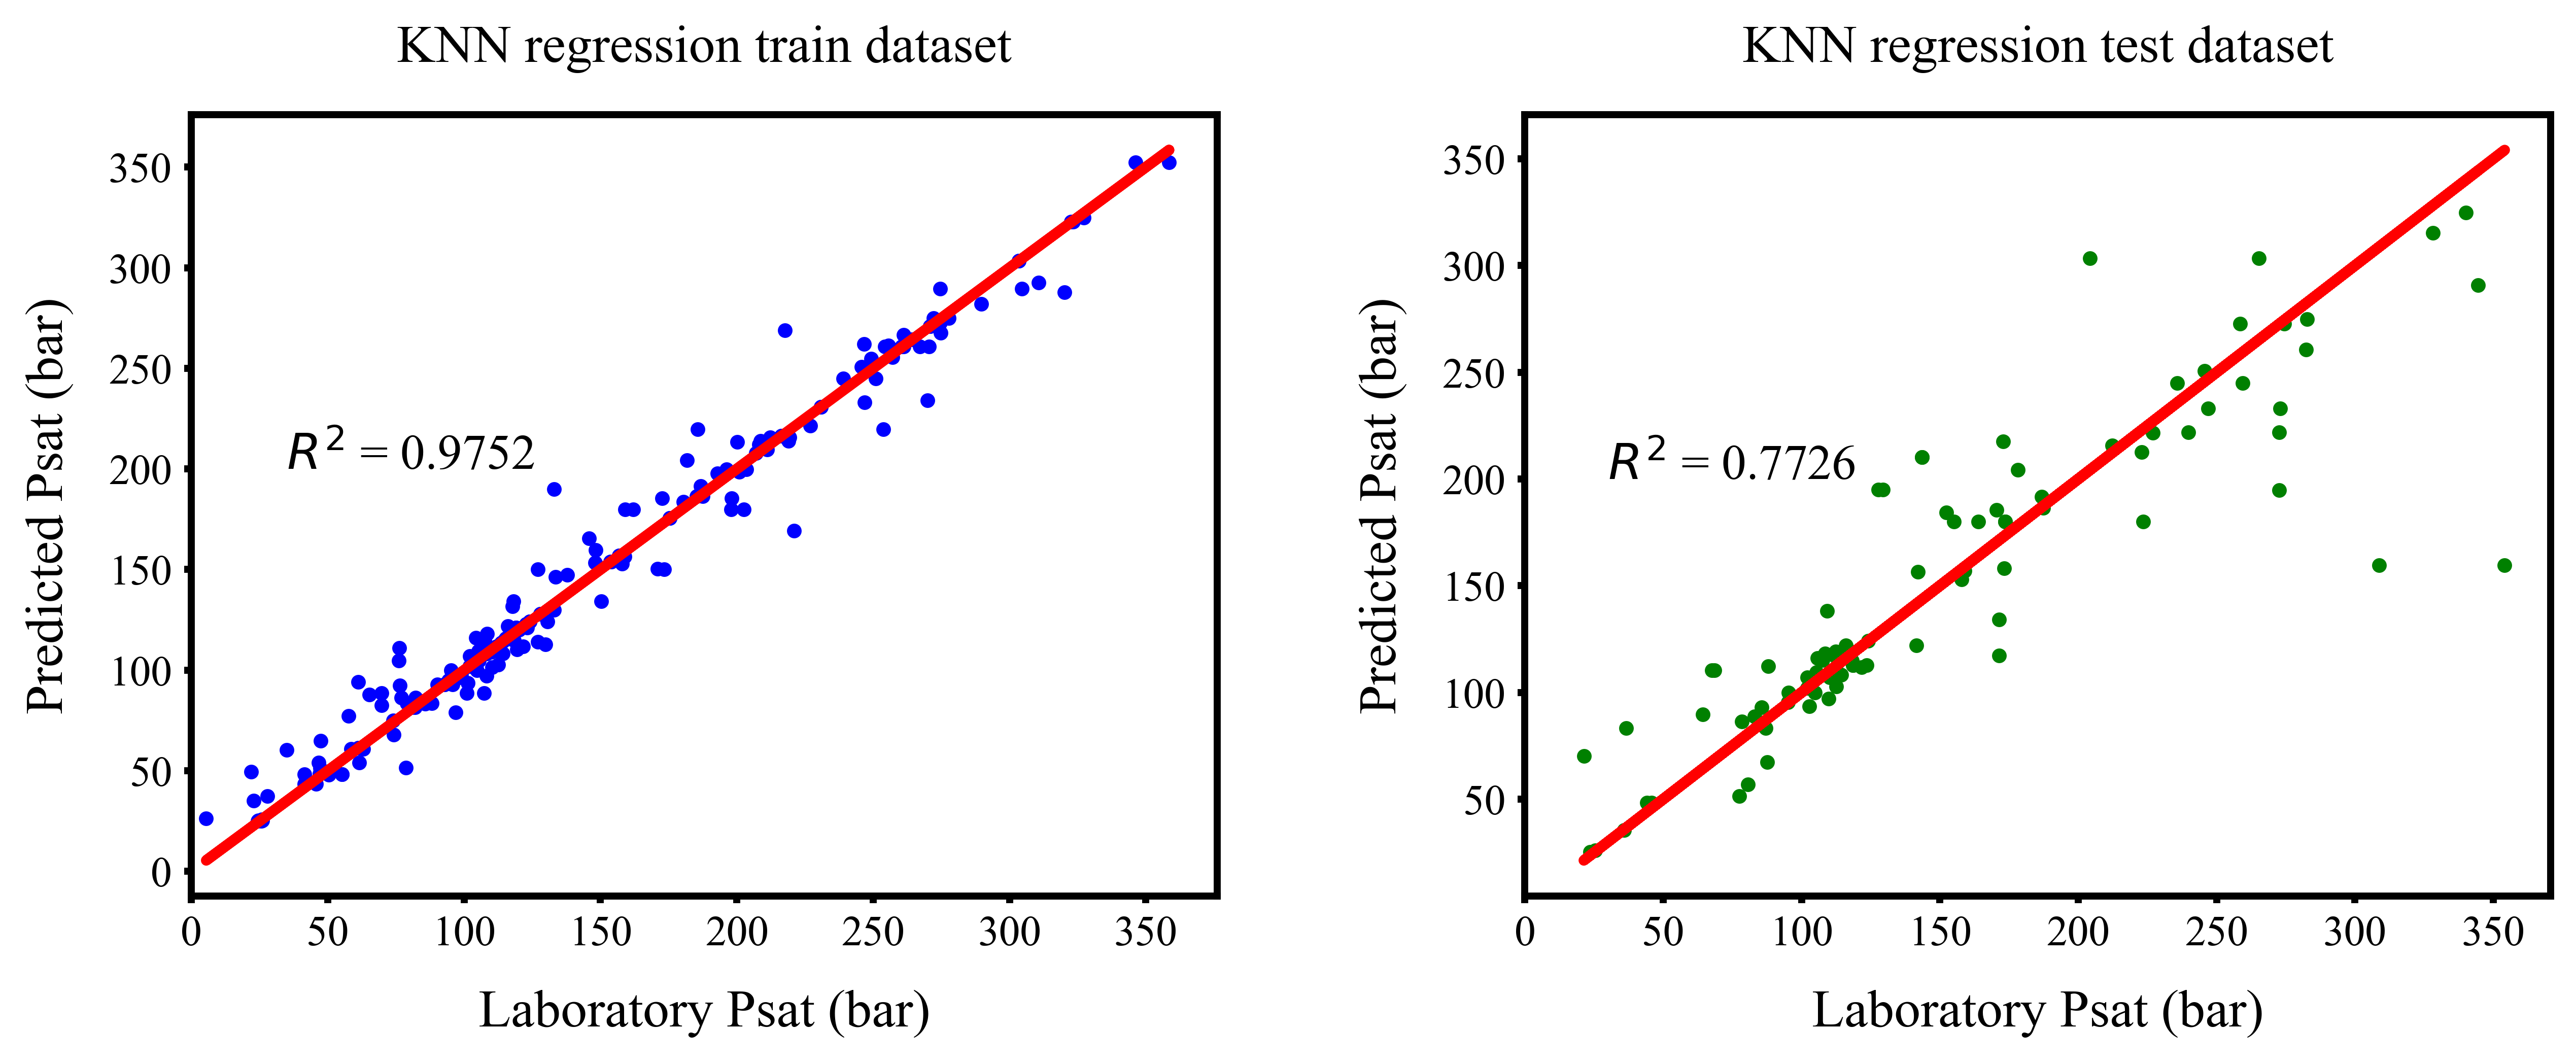

In [42]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"


fig_knn = plt.figure(figsize=(12,4) , dpi = 500)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.major.width'] = 2

ax1 = plt.subplot(121)
plt.scatter(y_train , knn_regression_train_Prediction , c = 'blue'  , s = 10 , label = "$R^2$ = {:.4f}".format(knn_regression_trainR2))
plt.plot(y_train,y_train, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Psat (bar)" , fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Psat (bar)", fontsize = 15 , labelpad = 10)
plt.title("KNN regression train dataset" , pad = 15 , fontsize = 15)
plt.text( 35,200 , "$R^2$ = {:.4f}".format(knn_regression_trainR2) , fontsize = 14)
plt.xlim((0,None))

ax2 = plt.subplot(122)
plt.scatter(y_test , knn_regression_test_Prediction , c = 'green'  , s = 10 , label = "$R^2$ = {:.4f}".format(knn_regression_testR2))
plt.plot(y_test,y_test, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Psat (bar)", fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Psat (bar)", fontsize = 15 , labelpad = 10)
plt.title("KNN regression test dataset" , pad = 15 , fontsize = 15)
plt.text( 30,200 , "$R^2$ = {:.4f}".format(knn_regression_testR2) , fontsize = 14)
plt.xlim((0,None))
for i in range(1,3,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)
        
plt.subplots_adjust(wspace=0.3,hspace=0.3)   

fig_knn.savefig(figure_path + "KNN Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
fig_knn.savefig(tif_figure + "KNN Result.tif" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

In [43]:
knn_MSE_train = mean_squared_error(y_train,knn_regression_train_Prediction)
knn_MAE_train = mean_absolute_error(y_train,knn_regression_train_Prediction)
knn_MSE_test  = mean_squared_error(y_test,knn_regression_test_Prediction)
knn_MAE_test  = mean_absolute_error(y_test,knn_regression_test_Prediction)
print(knn_MSE_train , knn_MAE_train , knn_MSE_test , knn_MAE_test )

150.69165331244142 7.150309309523808 1423.4802587186991 22.066930598901095


## 5. ANN Model

In [44]:
ann_regression_test_Prediction = ann_regression.predict(x_test)
ann_regression_train_Prediction = ann_regression.predict(x_train)


In [45]:
from sklearn.metrics import r2_score
ann_regression_trainR2 = r2_score(y_train , ann_regression_train_Prediction)
ann_regression_testR2 = r2_score(y_test , ann_regression_test_Prediction)
print(ann_regression_trainR2 , ann_regression_testR2)

0.9787545318179309 0.9111101010293764


In [46]:
result_ann_train = pd.DataFrame()
result_ann_train["Psat (train)"] = y_train
result_ann_train["Predicted Psat (train)"] = ann_regression_train_Prediction
result_ann_train["Residues"] = abs(result_ann_train["Psat (train)"] - result_ann_train["Predicted Psat (train)"])
result_ann_train["Absolute Error (%)"] = result_ann_train["Residues"]*100/result_ann_train["Psat (train)"]

result_ann_test = pd.DataFrame()
result_ann_test["Psat (test)"] = y_test
result_ann_test["Predicted Psat (test)"] = ann_regression_test_Prediction
result_ann_test["Residues"] = abs(result_ann_test["Psat (test)"] - result_ann_test["Predicted Psat (test)"])
result_ann_test["Absolute Error (%)"] = result_ann_test["Residues"]*100/result_ann_test["Psat (test)"]




In [47]:
result_ann_train.describe()

Psat (train)  Predicted Psat (train)    Residues  Absolute Error (%)
count    210.000000              210.000000  210.000000          210.000000
mean     145.241751              142.111313    7.189161            9.216826
std       78.207279               76.655258    8.832553           38.968357
min        5.442177               35.277073    0.002498            0.003274
25%       95.187075               88.854301    2.289500            1.758890
50%      118.673469              116.404152    4.548286            2.940889
75%      200.629252              202.367867    7.653133            7.230361
max      358.500000              323.003937   61.658658          553.493937

In [48]:
result_ann_test.describe()

Psat (test)  Predicted Psat (test)   Residues  Absolute Error (%)
count    91.000000              91.000000  91.000000           91.000000
mean    152.312915             145.020920  15.281614           12.379168
std      79.553047              71.042183  18.067482           17.490722
min      21.292517              35.503033   0.038275            0.034099
25%     103.746892              99.506866   3.365894            2.404648
50%     123.500000             119.184486   9.387848            5.812597
75%     195.748300             192.642593  17.815041           15.151589
max     354.114700             322.511230  95.297714           81.926361

<ipython-input-49-c4ec8cbb9197>:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_ann.savefig(figure_path + "ANN Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-49-c4ec8cbb9197>:39: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_ann.savefig(figure_path + "ANN Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-49-c4ec8cbb9197>:40: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_ann.savefig(tif_figure +

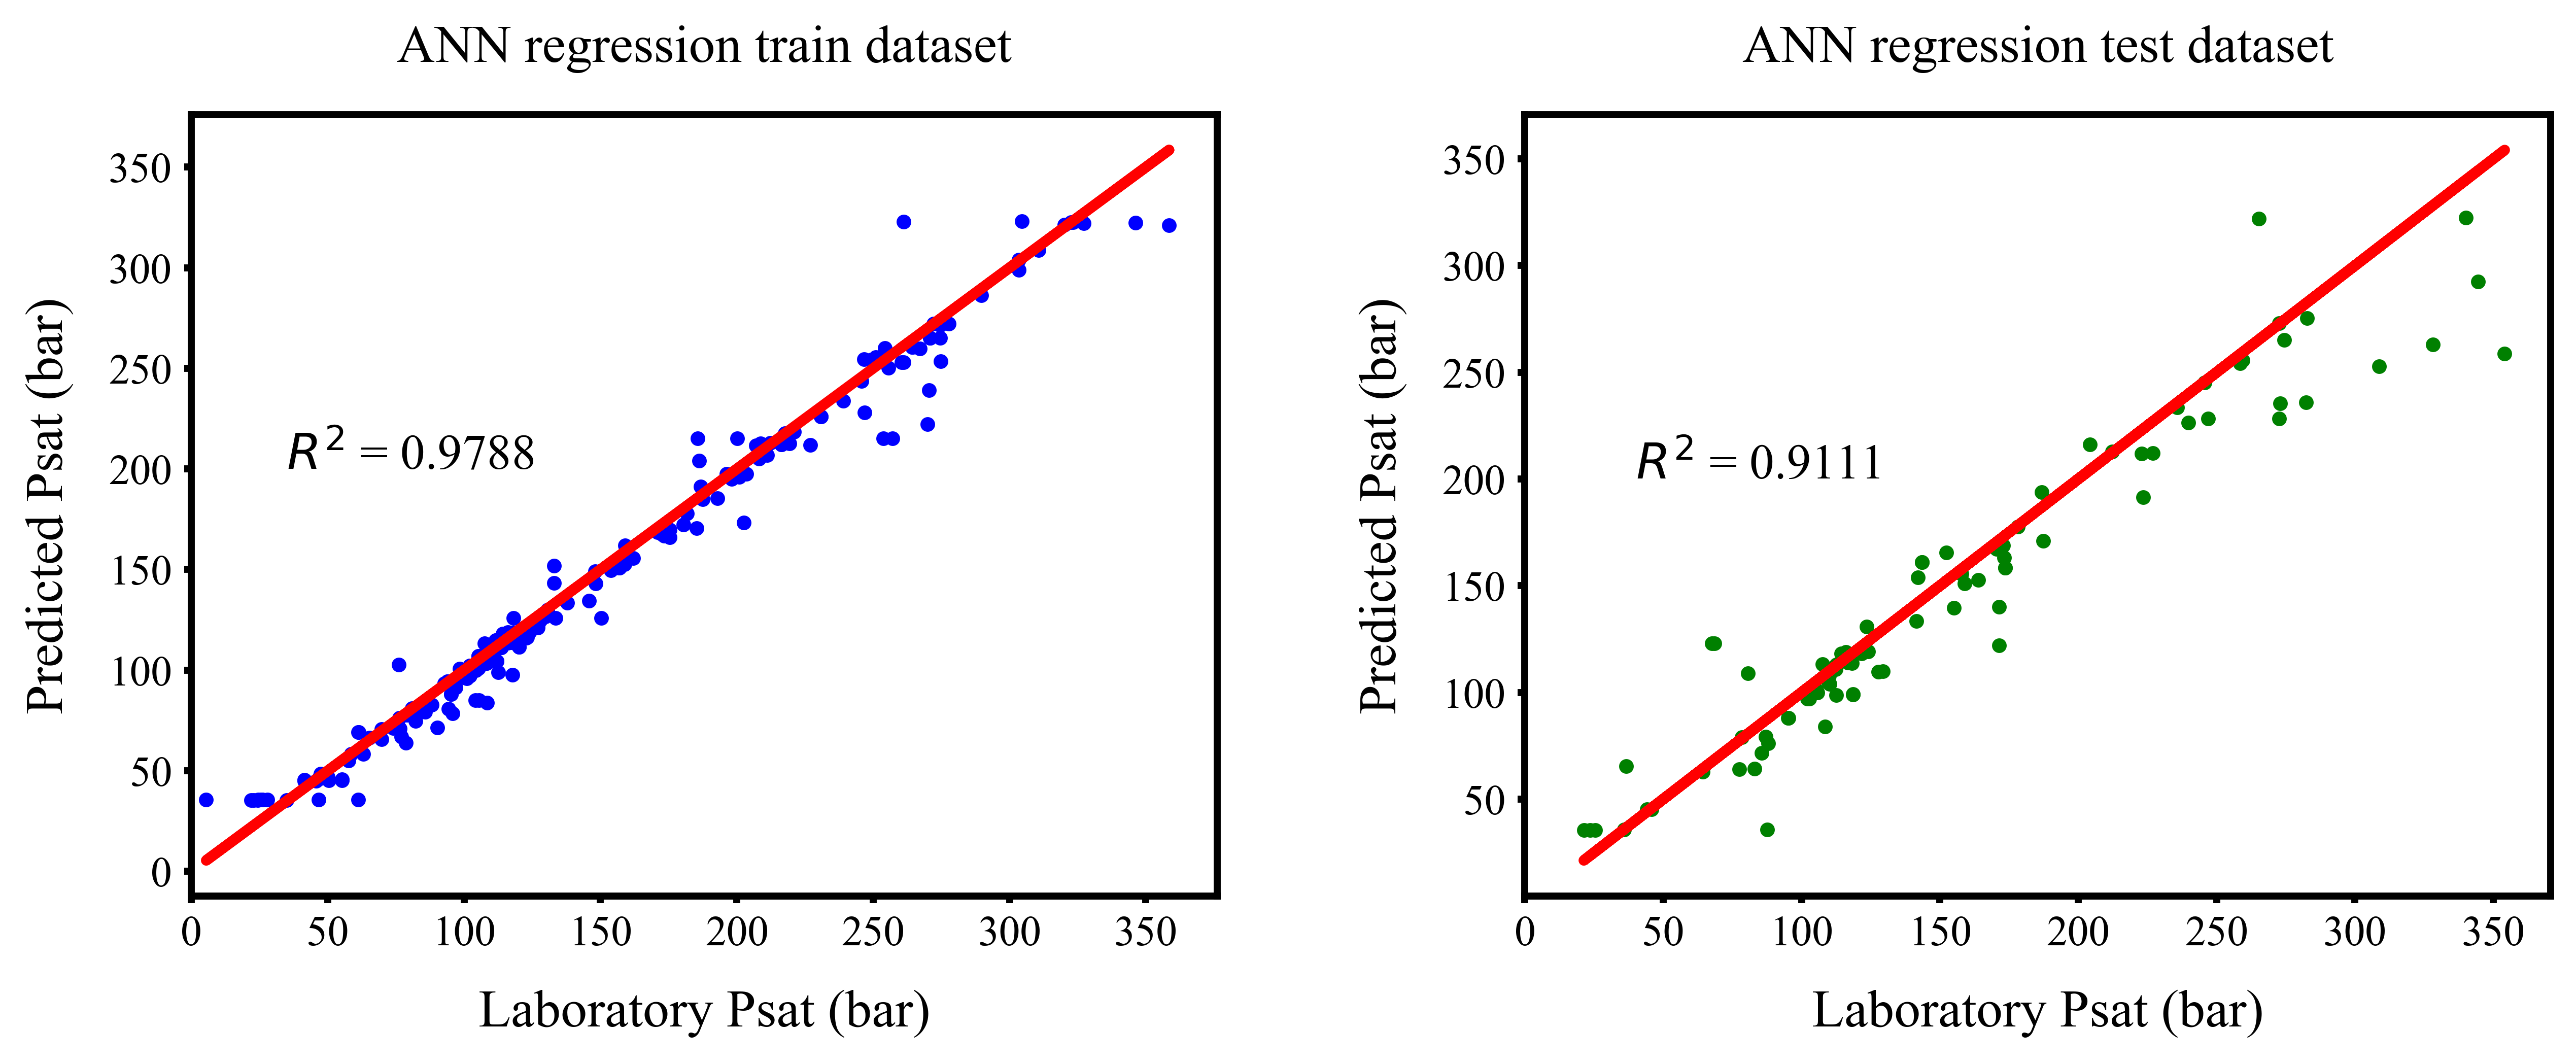

In [49]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"


fig_ann = plt.figure(figsize=(12,4) , dpi = 500)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.major.width'] = 2

ax1 = plt.subplot(121)
plt.scatter(y_train , ann_regression_train_Prediction , c = 'blue'  , s = 10 , label = "$R^2$ = {:.4f}".format(ann_regression_trainR2))
plt.plot(y_train,y_train, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Psat (bar)" , fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Psat (bar)", fontsize = 15 , labelpad = 10)
plt.title("ANN regression train dataset" , pad = 15 , fontsize = 15)
plt.text( 35,200 , "$R^2$ = {:.4f}".format(ann_regression_trainR2) , fontsize = 14)
plt.xlim((0,None))

ax2 = plt.subplot(122)
plt.scatter(y_test , ann_regression_test_Prediction , c = 'green'  , s = 10 , label = "$R^2$ = {:.4f}".format(ann_regression_testR2))
plt.plot(y_test,y_test, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Psat (bar)", fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Psat (bar)", fontsize = 15 , labelpad = 10)
plt.title("ANN regression test dataset" , pad = 15 , fontsize = 15)
plt.text( 40,200 , "$R^2$ = {:.4f}".format(ann_regression_testR2) , fontsize = 14)
plt.xlim((0,None))
for i in range(1,3,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)
        
plt.subplots_adjust(wspace=0.3,hspace=0.3) 

fig_ann.savefig(figure_path + "ANN Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
fig_ann.savefig(tif_figure + "ANN Result.tif" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

In [50]:
ann_MSE_train = mean_squared_error(y_train,ann_regression_train_Prediction)
ann_MAE_train = mean_absolute_error(y_train,ann_regression_train_Prediction)
ann_MSE_test  = mean_squared_error(y_test,ann_regression_test_Prediction)
ann_MAE_test  = mean_absolute_error(y_test,ann_regression_test_Prediction)
print(ann_MSE_train , ann_MAE_train , ann_MSE_test , ann_MAE_test )

129.32653602740896 7.189161316048176 556.374429228707 15.281613520574883


## 6. XGB Model

In [51]:
xgb_regression_test_Prediction = xgb_regression.predict(x_test)
xgb_regression_train_Prediction = xgb_regression.predict(x_train)


In [52]:
from sklearn.metrics import r2_score
xgb_regression_trainR2 = r2_score(y_train , xgb_regression_train_Prediction)
xgb_regression_testR2 = r2_score(y_test , xgb_regression_test_Prediction)
print(xgb_regression_trainR2 , xgb_regression_testR2)

0.9965461219129844 0.9735219761919922


In [53]:
result_xgb_train = pd.DataFrame()
result_xgb_train["Psat (train)"] = y_train
result_xgb_train["Predicted Psat (train)"] = xgb_regression_train_Prediction
result_xgb_train["Residues"] = abs(result_xgb_train["Psat (train)"] - result_xgb_train["Predicted Psat (train)"])
result_xgb_train["Absolute Error (%)"] = result_xgb_train["Residues"]*100/result_xgb_train["Psat (train)"]

result_xgb_test = pd.DataFrame()
result_xgb_test["Psat (test)"] = y_test
result_xgb_test["Predicted Psat (test)"] = xgb_regression_test_Prediction
result_xgb_test["Residues"] = abs(result_xgb_test["Psat (test)"] - result_xgb_test["Predicted Psat (test)"])
result_xgb_test["Absolute Error (%)"] = result_xgb_test["Residues"]*100/result_xgb_test["Psat (test)"]




<ipython-input-54-dd22ef91fc73>:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_xgb.savefig(figure_path + "XGB Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-54-dd22ef91fc73>:39: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_xgb.savefig(figure_path + "XGB Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-54-dd22ef91fc73>:40: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_xgb.savefig(tif_figure +

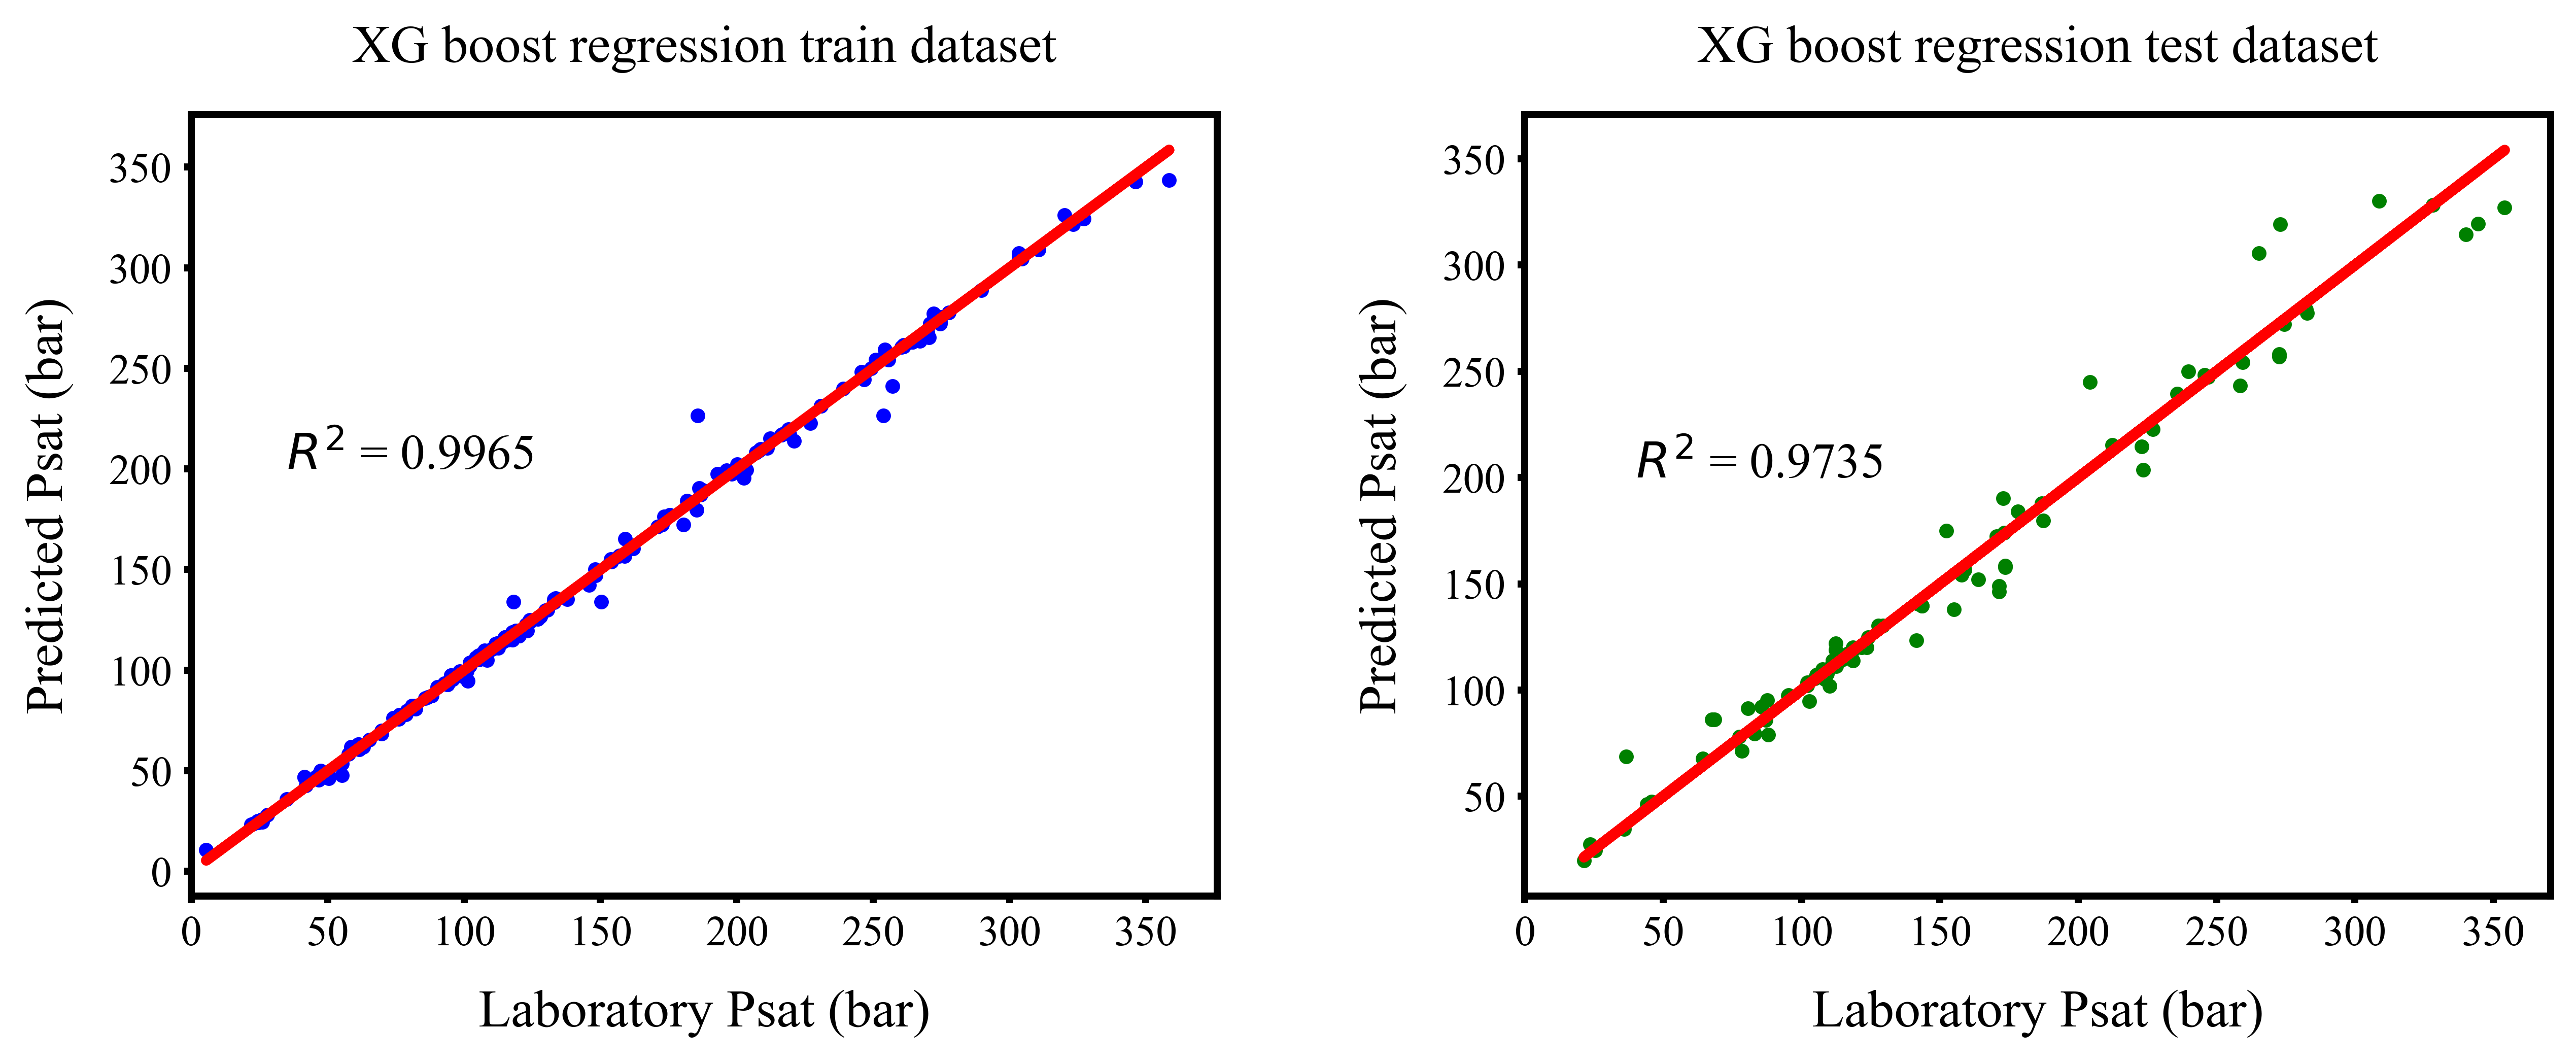

In [54]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"


fig_xgb= plt.figure(figsize=(12,4) , dpi = 500)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.major.width'] = 2

ax1 = plt.subplot(121)
plt.scatter(y_train , xgb_regression_train_Prediction , c = 'blue'  , s = 10 , label = "$R^2$ = {:.4f}".format(xgb_regression_trainR2))
plt.plot(y_train,y_train, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Psat (bar)" , fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Psat (bar)", fontsize = 15 , labelpad = 10)
plt.title("XG boost regression train dataset" , pad = 15 , fontsize = 15)
plt.text( 35,200 , "$R^2$ = {:.4f}".format(xgb_regression_trainR2) , fontsize = 14)
plt.xlim((0,None))

ax2 = plt.subplot(122)
plt.scatter(y_test , xgb_regression_test_Prediction , c = 'green'  , s = 10 , label = "$R^2$ = {:.4f}".format(xgb_regression_testR2))
plt.plot(y_test,y_test, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Psat (bar)", fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Psat (bar)", fontsize = 15 , labelpad = 10)
plt.title("XG boost regression test dataset" , pad = 15 , fontsize = 15)
plt.text( 40,200 , "$R^2$ = {:.4f}".format(xgb_regression_testR2) , fontsize = 14)
plt.xlim((0,None))
for i in range(1,3,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)
        
plt.subplots_adjust(wspace=0.3,hspace=0.3)  

fig_xgb.savefig(figure_path + "XGB Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
fig_xgb.savefig(tif_figure + "XGB Result.tif" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

In [55]:
xgb_MSE_train = mean_squared_error(y_train,xgb_regression_train_Prediction)
xgb_MAE_train = mean_absolute_error(y_train,xgb_regression_train_Prediction)
xgb_MSE_test  = mean_squared_error(y_test,xgb_regression_test_Prediction)
xgb_MAE_test  = mean_absolute_error(y_test,xgb_regression_test_Prediction)
print(xgb_MSE_train , xgb_MAE_train , xgb_MSE_test , xgb_MAE_test )

21.02462911274843 2.1310952753240673 165.72968980595854 8.169113938642901


In [56]:
result_xgb_train.describe()

Psat (train)  Predicted Psat (train)    Residues  Absolute Error (%)
count    210.000000              210.000000  210.000000          210.000000
mean     145.241751              145.217545    2.131095            2.118572
std       78.207279               77.753944    4.069635            6.905515
min        5.442177               10.547288    0.007790            0.007017
25%       95.187075               94.849291    0.450600            0.357748
50%      118.673469              118.971214    1.182919            0.925942
75%      200.629252              199.714146    2.071582            1.837726
max      358.500000              343.497589   40.848946           93.806411

In [57]:
result_xgb_test.describe()

Psat (test)  Predicted Psat (test)   Residues  Absolute Error (%)
count    91.000000              91.000000  91.000000           91.000000
mean    152.312915             152.145737   8.169114            6.121999
std      79.553047              78.272125  10.004760           10.312513
min      21.292517              19.821388   0.051202            0.050178
25%     103.746892             102.847363   1.528674            1.243462
50%     123.500000             122.052567   3.586627            3.253408
75%     195.748300             196.894722  11.253401            7.655522
max     354.114700             330.074707  46.250214           87.887829

## Preparing Dataframe containing result of all models evaluation parameters

#### 1. For test dataset

In [58]:


model_comp_test_paper = pd.DataFrame({
    'Model Name' : ['SVR' , 'DT' , 'RF' , 'KNN' , 'ANN',"XGB"],
    'R Square' : [ svr_regression_testR2 ,dt_regression_testR2,rf_regression_testR2,knn_regression_testR2,ann_regression_testR2,xgb_regression_testR2],
    'MSE' : [svr_MSE_test , dt_MSE_test ,  rf_MSE_test ,knn_MSE_test,ann_MSE_test,xgb_MSE_test],
    'MAE' : [svr_MAE_test , dt_MAE_test ,  rf_MAE_test ,knn_MAE_test,ann_MAE_test,xgb_MAE_test],
    '%AARD' : [
              result_svr_test.describe()["Absolute Error (%)"].loc["mean"],
              result_dt_test.describe()["Absolute Error (%)"].loc["mean"],
              result_rf_test.describe()["Absolute Error (%)"].loc["mean"],
              result_knn_test.describe()["Absolute Error (%)"].loc["mean"],
              result_ann_test.describe()["Absolute Error (%)"].loc["mean"],
              result_xgb_test.describe()["Absolute Error (%)"].loc["mean"]
             ]

})

In [59]:
model_comp_test_paper.to_excel(export_data_path+"Result_Compare_test.xlsx",index = False)

#### 2. For train dataset

In [60]:
model_comp_train_paper = pd.DataFrame({
    'Model Name' : ['SVR' , 'DT' , 'RF' , 'KNN' , 'ANN',"XGB"],
    'R Square' : [svr_regression_trainR2 ,dt_regression_trainR2,rf_regression_trainR2,knn_regression_trainR2,ann_regression_trainR2,xgb_regression_trainR2],
    'MSE' : [svr_MSE_train , dt_MSE_train ,  rf_MSE_train ,knn_MSE_train,ann_MSE_train,xgb_MSE_train],
    'MAE' : [ svr_MAE_train , dt_MAE_train ,  rf_MAE_train ,knn_MAE_train,ann_MAE_train,xgb_MSE_train],
    '%AARD' : [
              result_svr_train.describe()["Absolute Error (%)"].loc["mean"],
              result_dt_train.describe()["Absolute Error (%)"].loc["mean"],
              result_rf_train.describe()["Absolute Error (%)"].loc["mean"],
              result_knn_train.describe()["Absolute Error (%)"].loc["mean"],
              result_ann_train.describe()["Absolute Error (%)"].loc["mean"],
             result_xgb_train.describe()["Absolute Error (%)"].loc["mean"]]
})

In [61]:
#Storing to excel file
model_comp_train_paper.to_excel(export_data_path+"Result_Compare_train.xlsx",index = False)

In [62]:
#Creating Dataframe For bar plot by adding label train and test and merging both dataframe

model_comp_test_paper["Label"] = "Test"
model_comp_train_paper["Label"] = "Train"
Final_bar_plot = model_comp_test_paper.append(model_comp_train_paper)
Final_bar_plot

Model Name  R Square          MSE        MAE      %AARD  Label
0        SVR  0.947333   329.650283  11.241067  10.156642   Test
1         DT  0.954478   284.929477  11.143374   8.907655   Test
2         RF  0.967637   202.565652   8.977629   7.084228   Test
3        KNN  0.772576  1423.480259  22.066931  17.257524   Test
4        ANN  0.911110   556.374429  15.281614  12.379168   Test
5        XGB  0.973522   165.729690   8.169114   6.121999   Test
0        SVR  0.960656   239.497203   9.608659   7.987822  Train
1         DT  0.976009   146.038980   7.262473   7.683390  Train
2         RF  0.991184    53.667011   4.453499   5.373606  Train
3        KNN  0.975245   150.691653   7.150309   8.724922  Train
4        ANN  0.978755   129.326536   7.189161   9.216826  Train
5        XGB  0.996546    21.024629  21.024629   2.118572  Train

## Bar plot which comparing the % AARD values

<ipython-input-63-e4531bef6efe>:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_aard.savefig(figure_path + "AARD Result.jpg" ,quality = 95 , dpi = 500 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-63-e4531bef6efe>:25: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_aard.savefig(figure_path + "AARD Result.jpg" ,quality = 95 , dpi = 500 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-63-e4531bef6efe>:26: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_aard.savefig(tif_fig

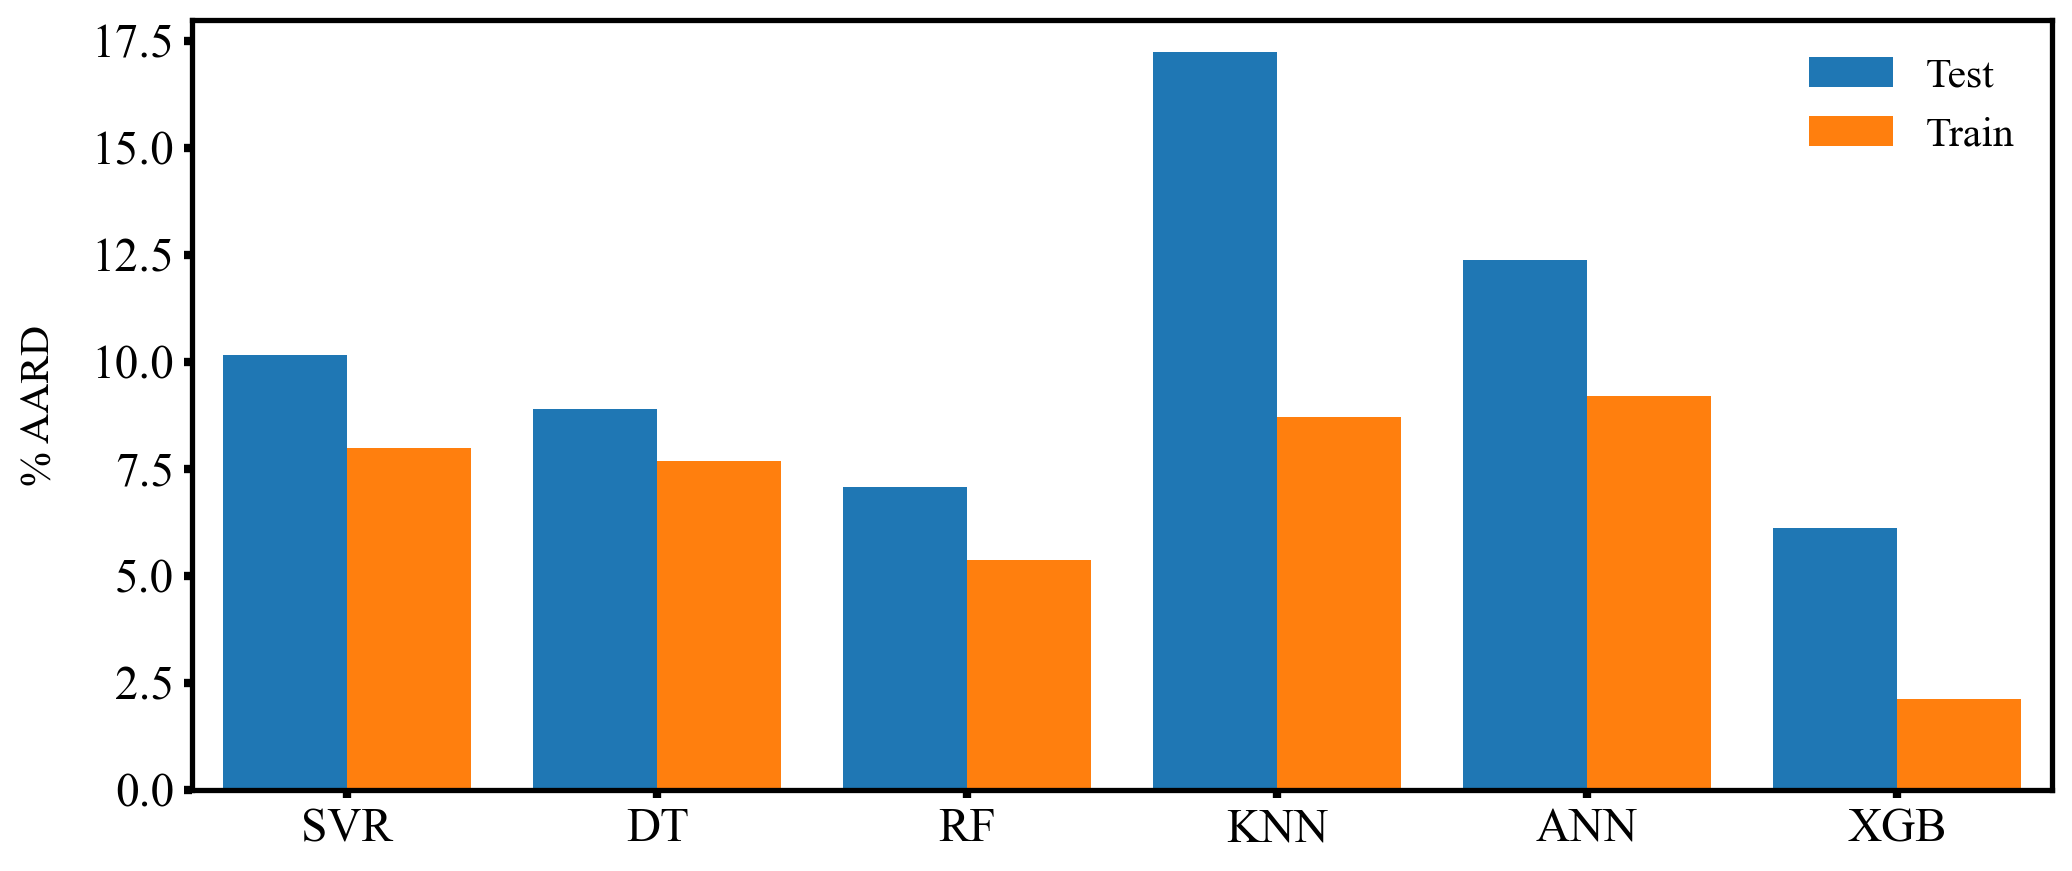

In [63]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('xtick', labelsize=17)
plt.rc('ytick', labelsize=17)


mpl.rcParams['xtick.major.size'] = 3
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['ytick.major.size'] = 3
mpl.rcParams['ytick.major.width'] = 3
fig_aard = plt.figure(figsize = (12,5) , dpi = 200)

ax = sns.barplot( x = "Model Name" , y = "%AARD" , data = Final_bar_plot , hue = "Label" , saturation = 10)

plt.legend(fontsize = 15 ,  frameon=False )
plt.ylabel("% AARD" , fontsize = 15 , labelpad = 12)
plt.ylim((0,18))
ax.set(xlabel = None)


ax = fig_aard.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.9)

fig_aard.savefig(figure_path + "AARD Result.jpg" ,quality = 95 , dpi = 500 ,papertype = "letter",bbox_inches = "tight")
fig_aard.savefig(tif_figure + "AARD Result.tif" ,quality = 95 , dpi = 500 ,papertype = "letter",bbox_inches = "tight")

## Bar plot which comparing the MSE values

<ipython-input-64-21db02ddcb09>:24: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_mse.savefig(figure_path + "MSE Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-64-21db02ddcb09>:24: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_mse.savefig(figure_path + "MSE Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-64-21db02ddcb09>:25: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_mse.savefig(tif_figure +

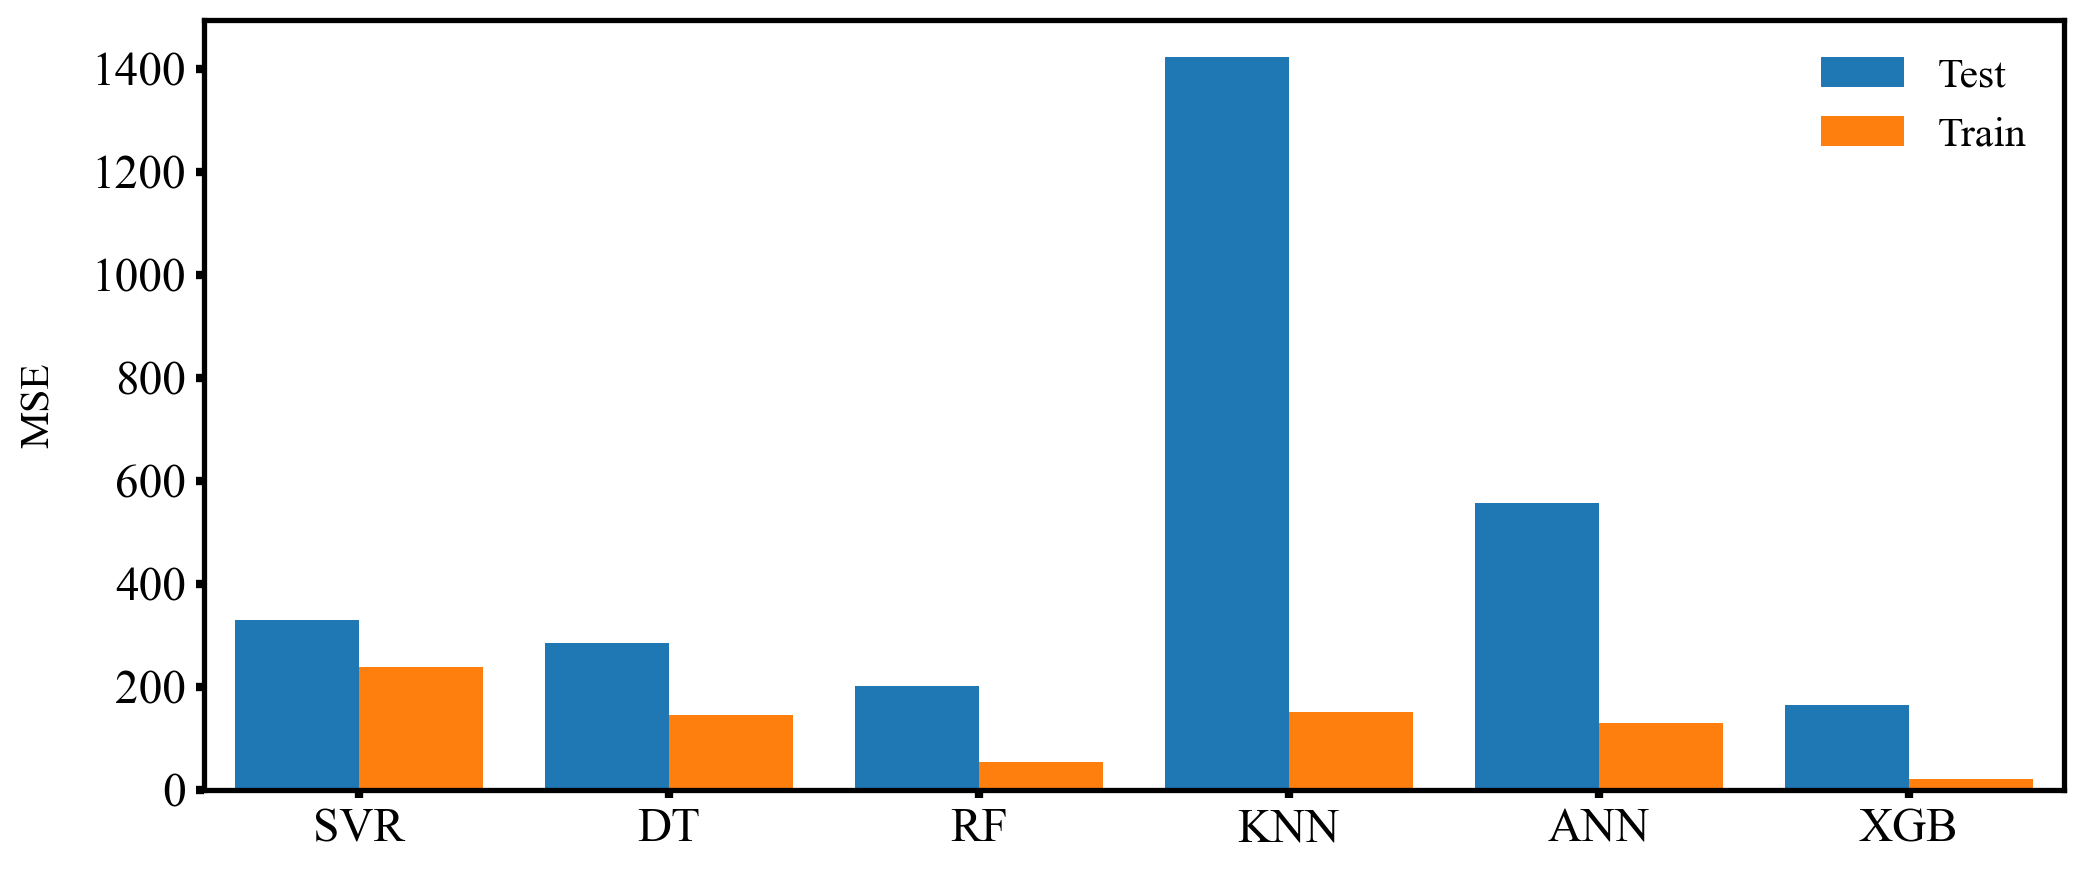

In [64]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('xtick', labelsize=17)
plt.rc('ytick', labelsize=17)


mpl.rcParams['xtick.major.size'] = 3
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['ytick.major.size'] = 3
mpl.rcParams['ytick.major.width'] = 3
fig_mse = plt.figure(figsize = (12,5) , dpi = 200)

ax = sns.barplot( x = "Model Name" , y = "MSE" , data = Final_bar_plot , hue = "Label" , saturation = 10)

plt.legend(fontsize = 15 ,  frameon=False )
plt.ylabel("MSE" , fontsize = 15 , labelpad = 12)
ax.set(xlabel = None)


ax = fig_mse.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.9)

fig_mse.savefig(figure_path + "MSE Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
fig_mse.savefig(tif_figure + "MSE Result.tif" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

## Creating Dataframes for closeness result plots and comaparision for residuals plots

In [65]:
svr_plot_result = result_svr_test[["Psat (test)","Predicted Psat (test)"]].reset_index(drop=True)
dt_plot_result = result_dt_test[["Psat (test)","Predicted Psat (test)"]].reset_index(drop=True)
rf_plot_result = result_rf_test[["Psat (test)","Predicted Psat (test)"]].reset_index(drop=True)
knn_plot_result = result_knn_test[["Psat (test)","Predicted Psat (test)"]].reset_index(drop=True)
ann_plot_result = result_ann_test[["Psat (test)","Predicted Psat (test)"]].reset_index(drop=True)
xgb_plot_result = result_xgb_test[["Psat (test)","Predicted Psat (test)"]].reset_index(drop=True)

svr_plot_result["Residual"] = svr_plot_result["Psat (test)"] - svr_plot_result["Predicted Psat (test)"]
dt_plot_result["Residual"] = dt_plot_result["Psat (test)"] - dt_plot_result["Predicted Psat (test)"]
rf_plot_result["Residual"] = rf_plot_result["Psat (test)"] - rf_plot_result["Predicted Psat (test)"]
knn_plot_result["Residual"] = knn_plot_result["Psat (test)"] - knn_plot_result["Predicted Psat (test)"]
ann_plot_result["Residual"] = ann_plot_result["Psat (test)"] - ann_plot_result["Predicted Psat (test)"]
xgb_plot_result["Residual"] = xgb_plot_result["Psat (test)"] - xgb_plot_result["Predicted Psat (test)"]

## Scatter plot which comparing the residuals values for entire dataset for each saturation pressure records


<ipython-input-66-70ae1d6d3eec>:32: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_compare_res.savefig(figure_path + "fig_compare_res.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-66-70ae1d6d3eec>:32: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_compare_res.savefig(figure_path + "fig_compare_res.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-66-70ae1d6d3eec>:33: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fi

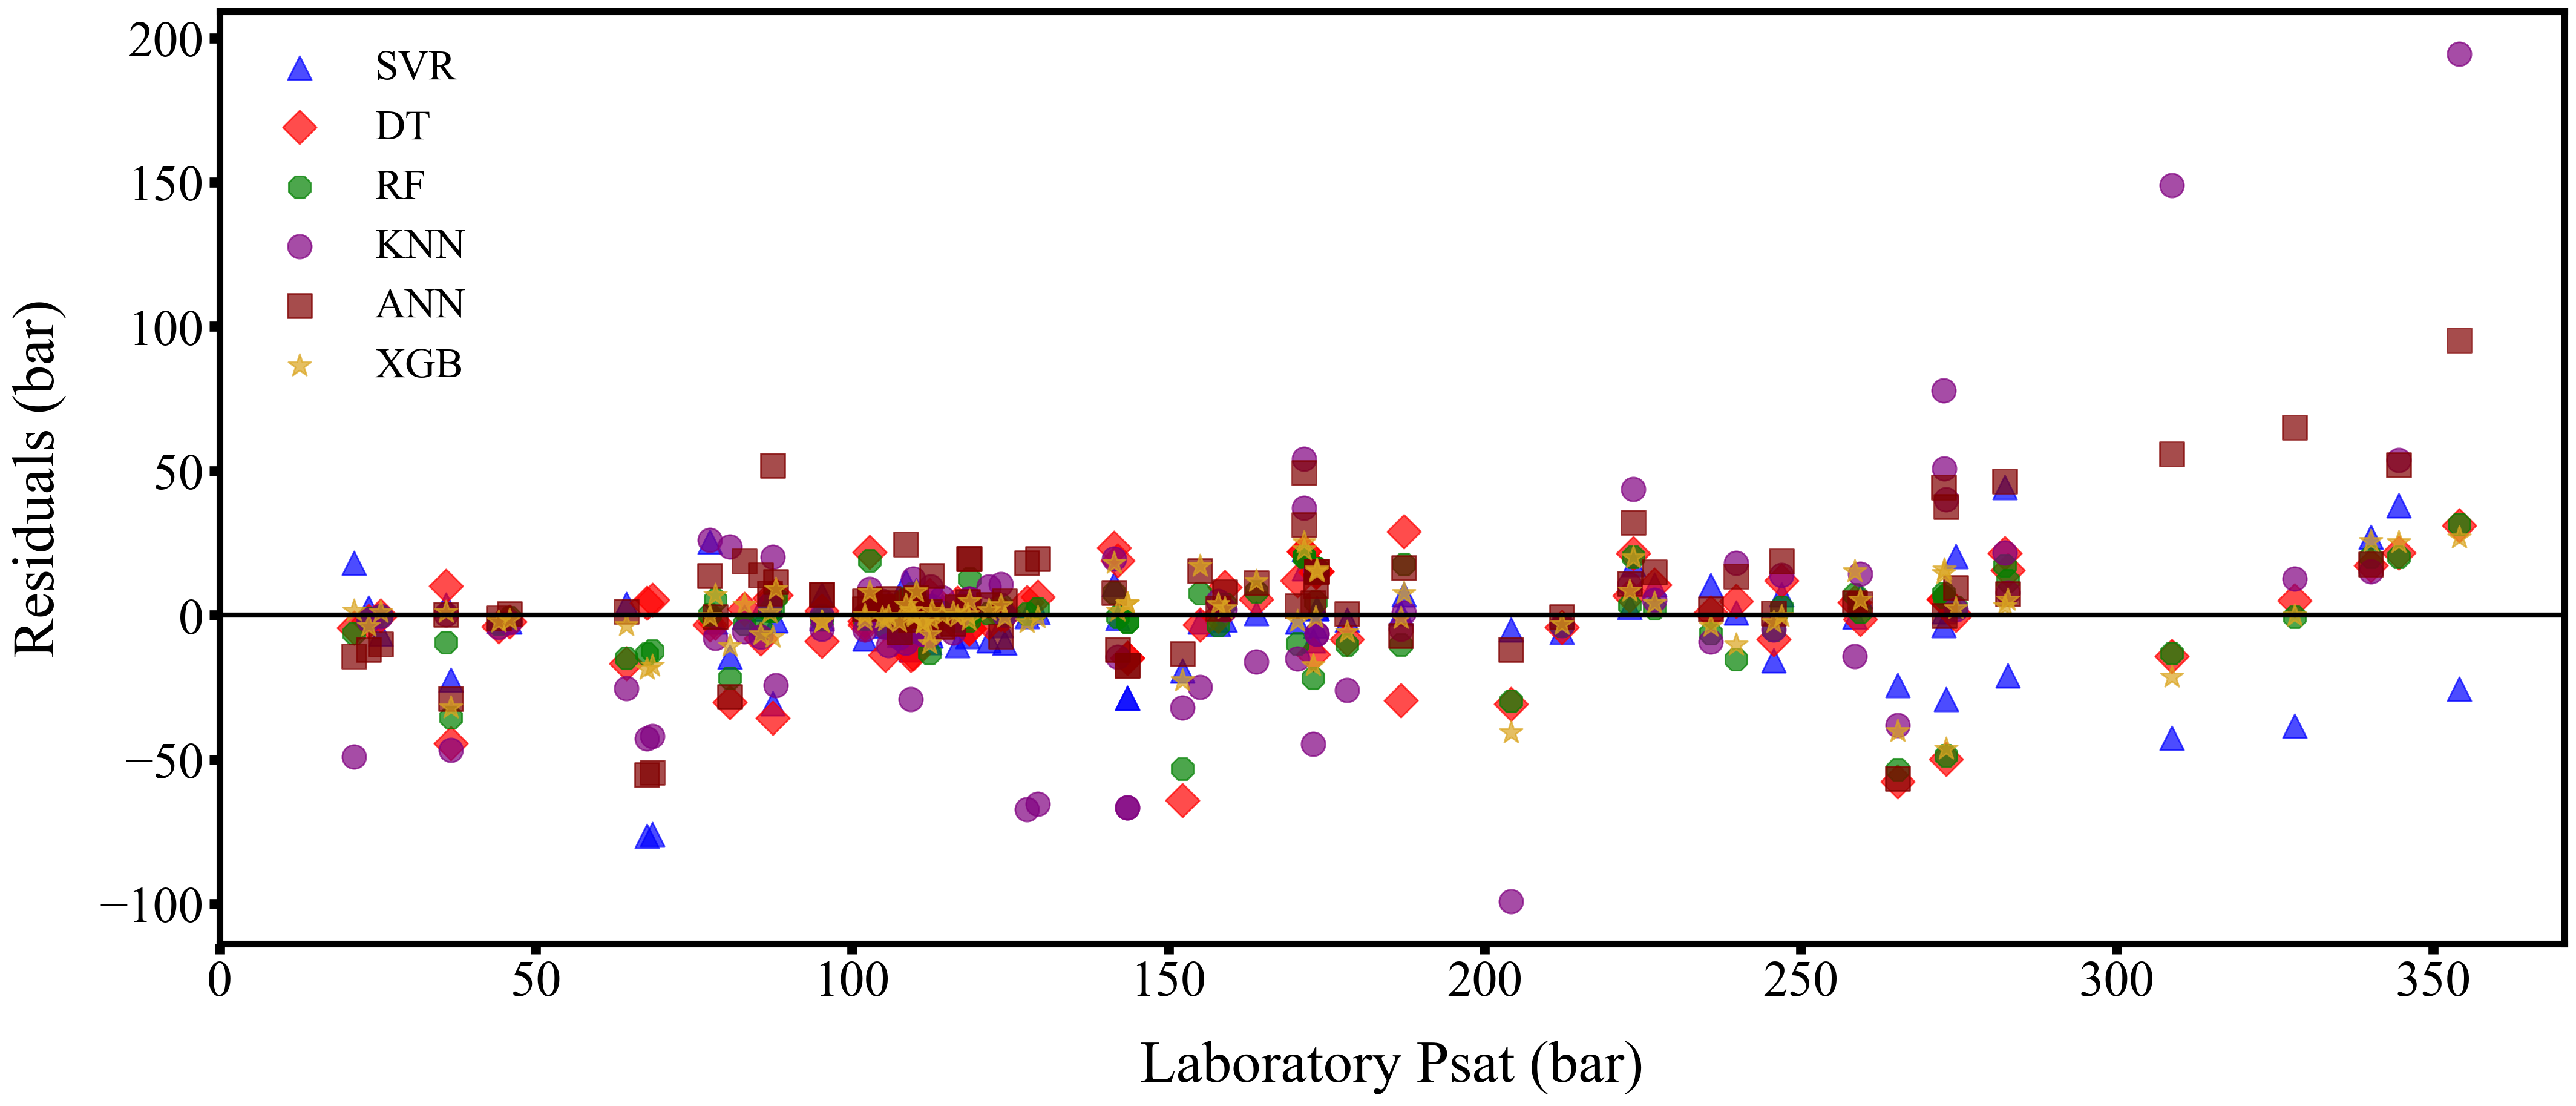

In [66]:
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 6


fig_compare_res = plt.figure(figsize = (25,10) , dpi = 200)
plt.scatter(svr_plot_result["Psat (test)"] ,svr_plot_result["Residual"] , marker = "^" , s = 200 , c = "blue",label = "SVR",alpha = 0.7)
plt.scatter(dt_plot_result["Psat (test)"] ,dt_plot_result["Residual"] , marker = "D" , s = 200 , c = "red",label = "DT",alpha = 0.7)
plt.scatter(rf_plot_result["Psat (test)"] ,rf_plot_result["Residual"] , marker = "8" , s = 200 , c = "green",label = "RF",alpha = 0.7)
plt.scatter(knn_plot_result["Psat (test)"] ,knn_plot_result["Residual"] , marker = "o" , s = 200 , c = "purple",label = "KNN",alpha = 0.7)
plt.scatter(ann_plot_result["Psat (test)"] ,ann_plot_result["Residual"] , marker = "s" , s = 200 , c = "maroon",label = "ANN",alpha = 0.7)
plt.scatter(xgb_plot_result["Psat (test)"] ,xgb_plot_result["Residual"] , marker = "*" , s = 200 , c = "goldenrod",label = "XGB",alpha = 0.7)


plt.legend(fontsize = 25,frameon=False)
plt.xlabel("Laboratory Psat (bar)" , fontsize = 35, labelpad = 20)
plt.ylabel("Residuals (bar)",fontsize = 35, labelpad = 20)
plt.xlim((0,None))

#Defining axis of graph and increasing width of boarder of box
ax = fig_compare_res.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(4)
    
plt.axhline(y = 0, color = 'black',ls = "-" ,lw = 3)


fig_compare_res.savefig(figure_path + "fig_compare_res.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
fig_compare_res.savefig(tif_figure + "fig_compare_res.tif" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

#### 1. SVR GRAPH

<ipython-input-80-7bbc41bad693>:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_svr2.savefig(figure_path + "svr_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-80-7bbc41bad693>:28: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_svr2.savefig(figure_path + "svr_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-80-7bbc41bad693>:29: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_svr2.savefig(tif_figure + 

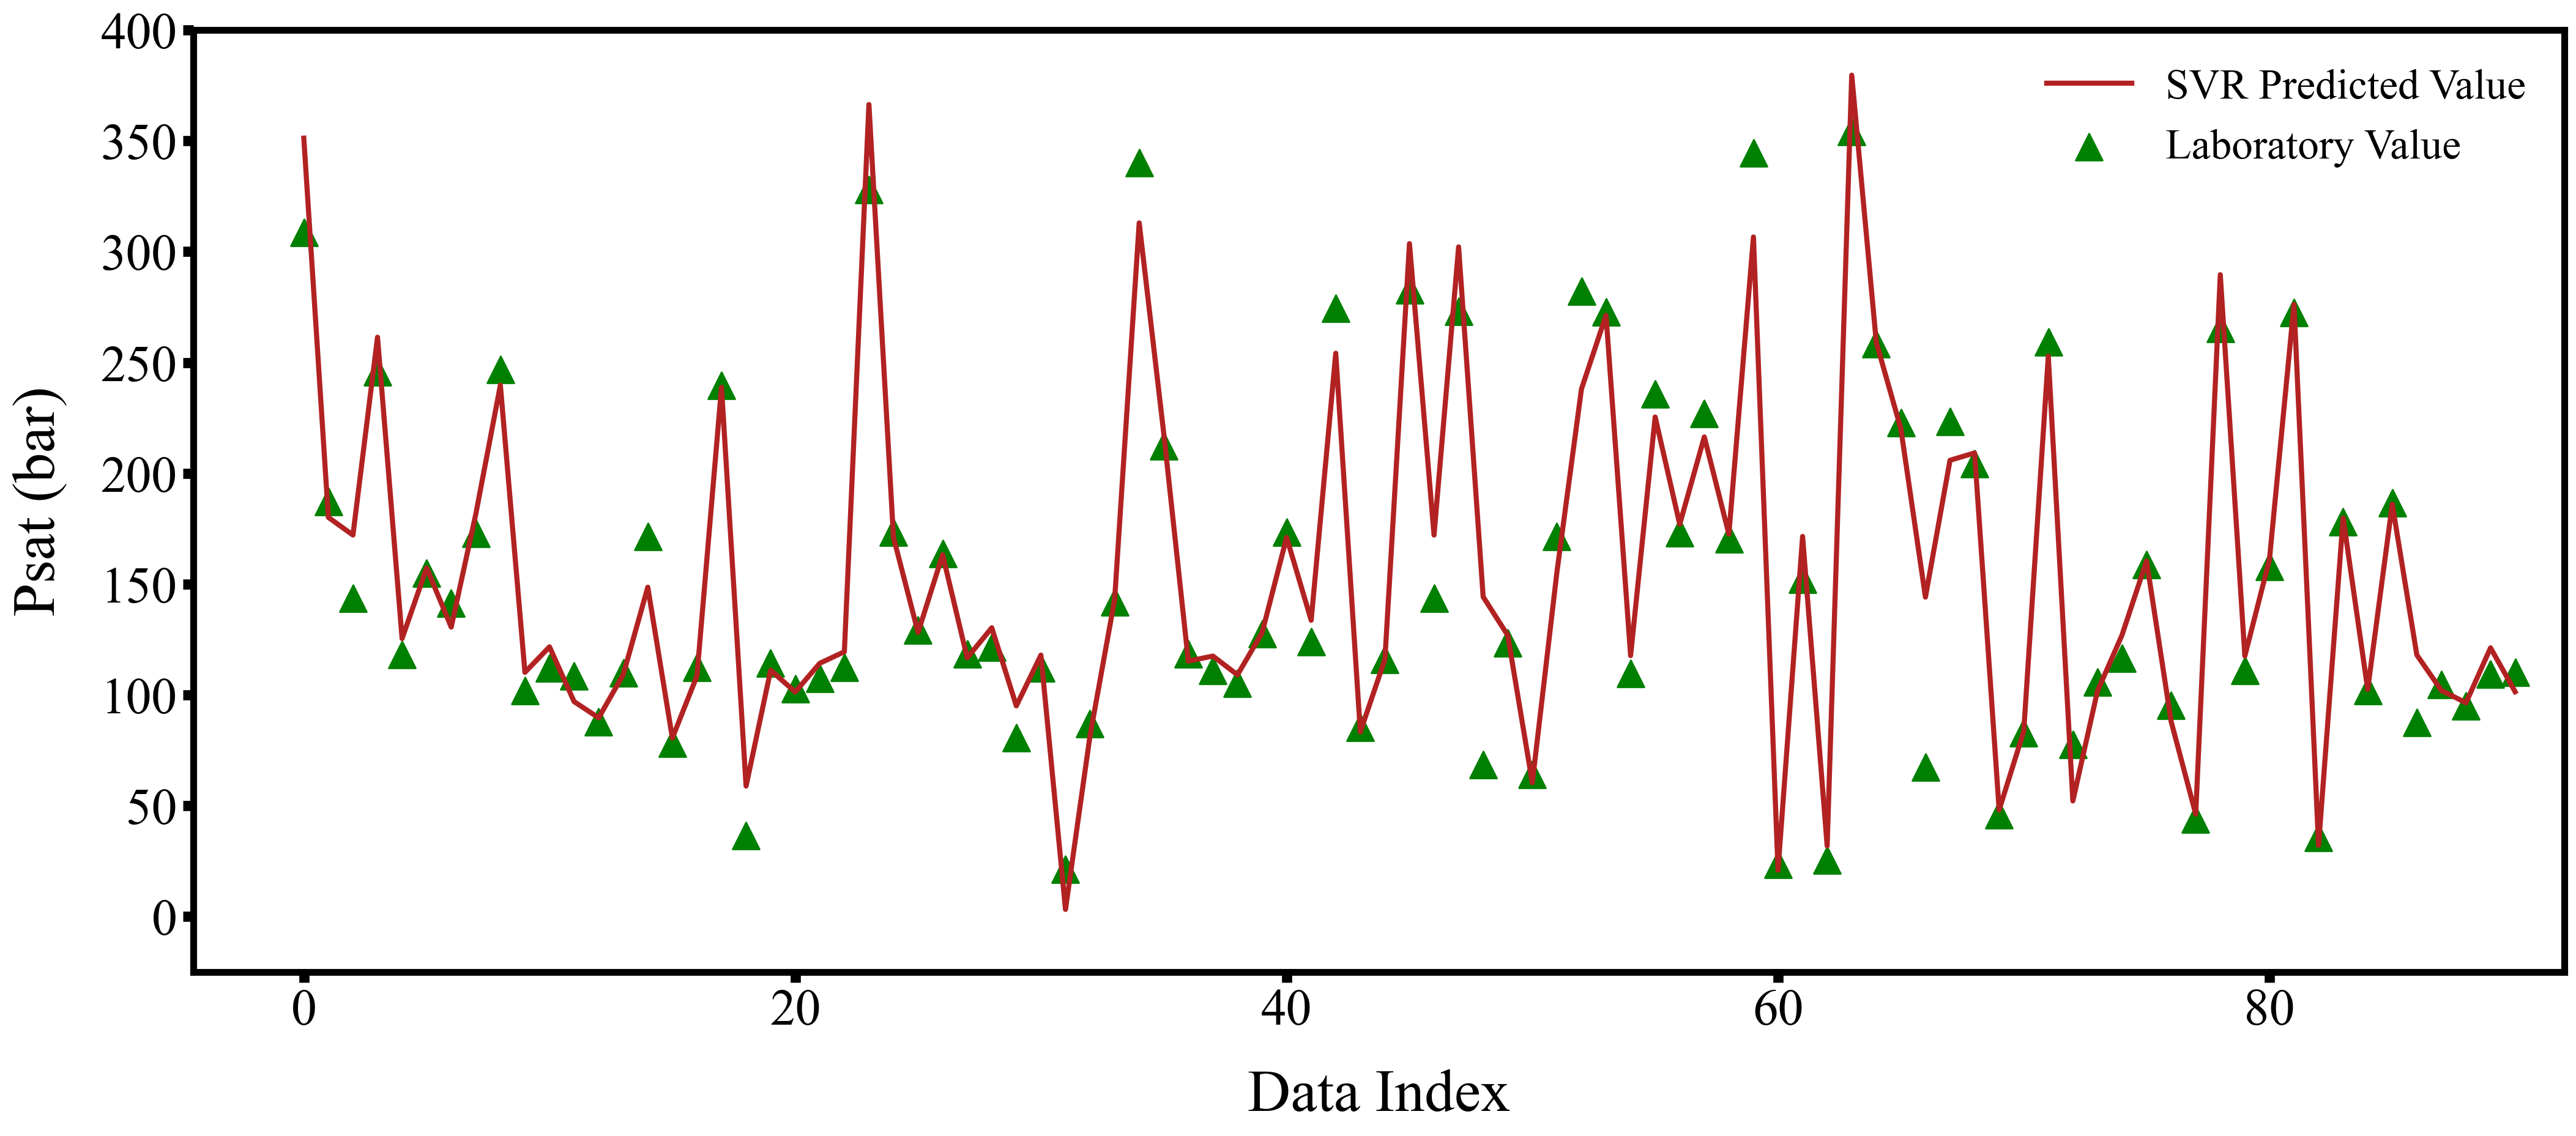

In [80]:
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 6


fig_svr2 = plt.figure(figsize = (25,10) , dpi = 200)
plt.scatter(svr_plot_result.index ,svr_plot_result[["Psat (test)"]] , marker = "^" , s = 250 , c = "green",label = "Laboratory Value")
#plt.plot(svr_plot_result.index ,svr_plot_result[["Psat (test)"]] ,lw = 3 , c = "green" , label = "Laboratory Value")

plt.plot(svr_plot_result.index ,svr_plot_result[["Predicted Psat (test)"]] ,lw = 3 , c = "firebrick",label = "SVR Predicted Value")

plt.legend(fontsize = 25,frameon=False)
plt.xlabel("Data Index" , fontsize = 35, labelpad = 20)
plt.ylabel("Psat (bar)",fontsize = 35, labelpad = 20)
plt.xlim(None,92)
plt.ylim(-25,400)

#Defining axis of graph and increasing width of boarder of box
ax = fig_svr2.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(4)


fig_svr2.savefig(figure_path + "svr_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
fig_svr2.savefig(tif_figure + "svr_line.tif" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

#### 2. dt GRAPH

<ipython-input-81-3c1b13a9f38a>:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_dt2.savefig(figure_path + "dt_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-81-3c1b13a9f38a>:28: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_dt2.savefig(figure_path + "dt_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-81-3c1b13a9f38a>:29: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_dt2.savefig(tif_figure + "dt_l

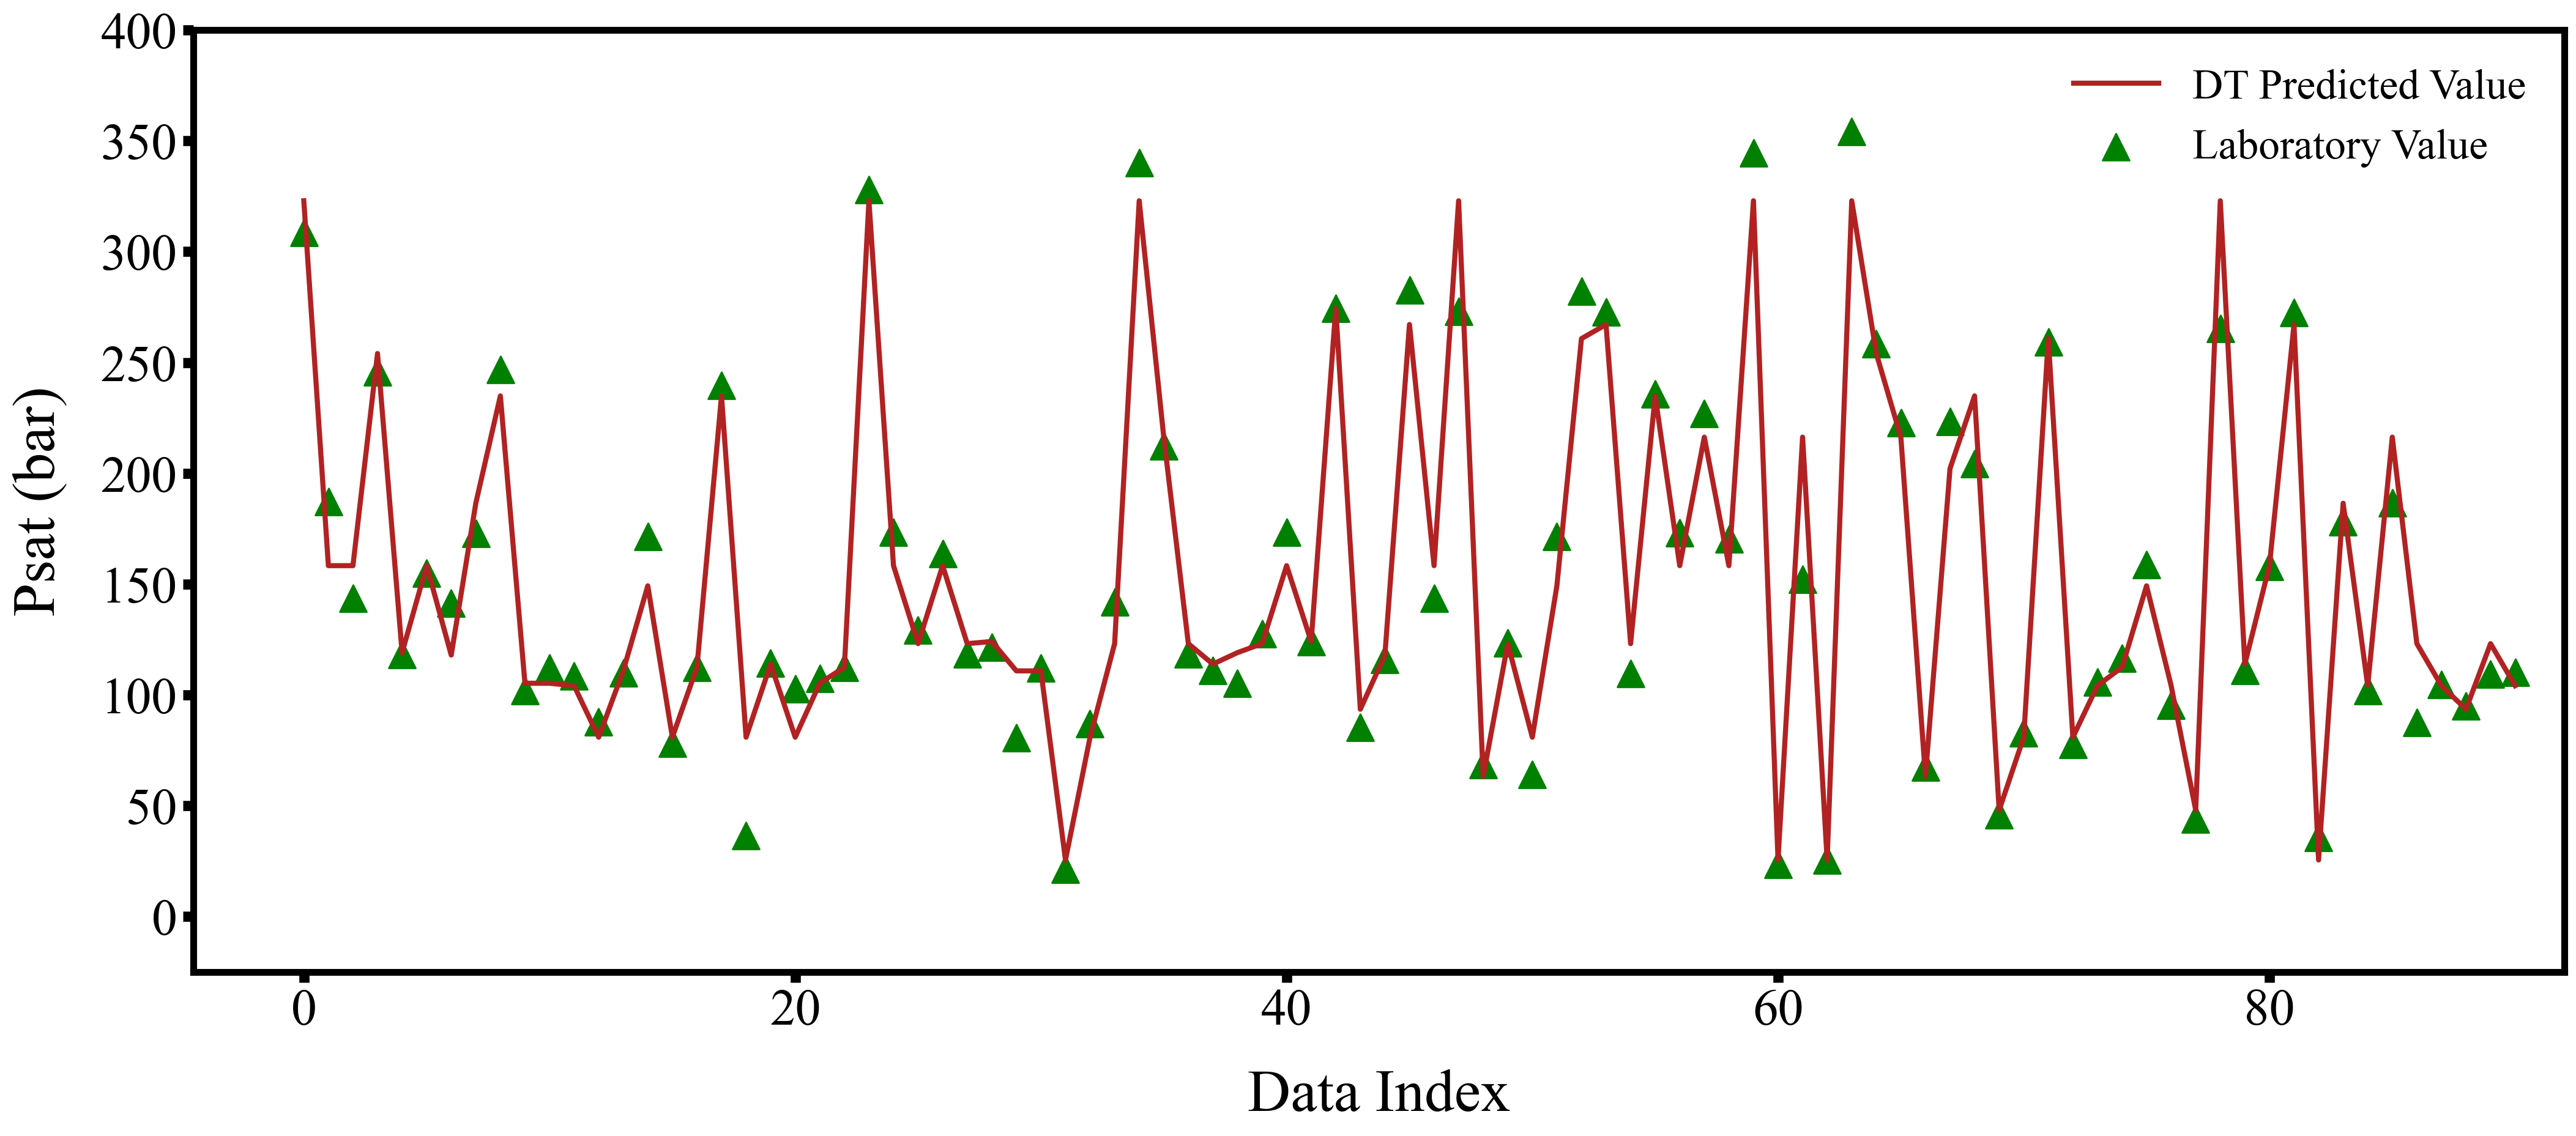

In [81]:
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 6


fig_dt2 = plt.figure(figsize = (25,10) , dpi = 200)
plt.scatter(dt_plot_result.index ,dt_plot_result[["Psat (test)"]] , marker = "^" , s = 250 , c = "green",label = "Laboratory Value")
#plt.plot(dt_plot_result.index ,dt_plot_result[["Psat (test)"]] ,lw = 3 , c = "green" , label = "Laboratory Value")

plt.plot(dt_plot_result.index ,dt_plot_result[["Predicted Psat (test)"]] ,lw = 3 , c = "firebrick",label = "DT Predicted Value")

plt.legend(fontsize = 25,frameon=False)
plt.xlabel("Data Index" , fontsize = 35, labelpad = 20)
plt.ylabel("Psat (bar)",fontsize = 35, labelpad = 20)
plt.xlim(None,92)
plt.ylim(-25,400)

#Defining axis of graph and increasing width of boarder of box
ax = fig_dt2.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(4)


fig_dt2.savefig(figure_path + "dt_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
fig_dt2.savefig(tif_figure + "dt_line.tif" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

#### 3. RF GRAPH

<ipython-input-82-94e2608aa6b4>:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_rf2.savefig(figure_path + "rf_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-82-94e2608aa6b4>:28: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_rf2.savefig(figure_path + "rf_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-82-94e2608aa6b4>:29: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_rf2.savefig(tif_figure + "rf_l

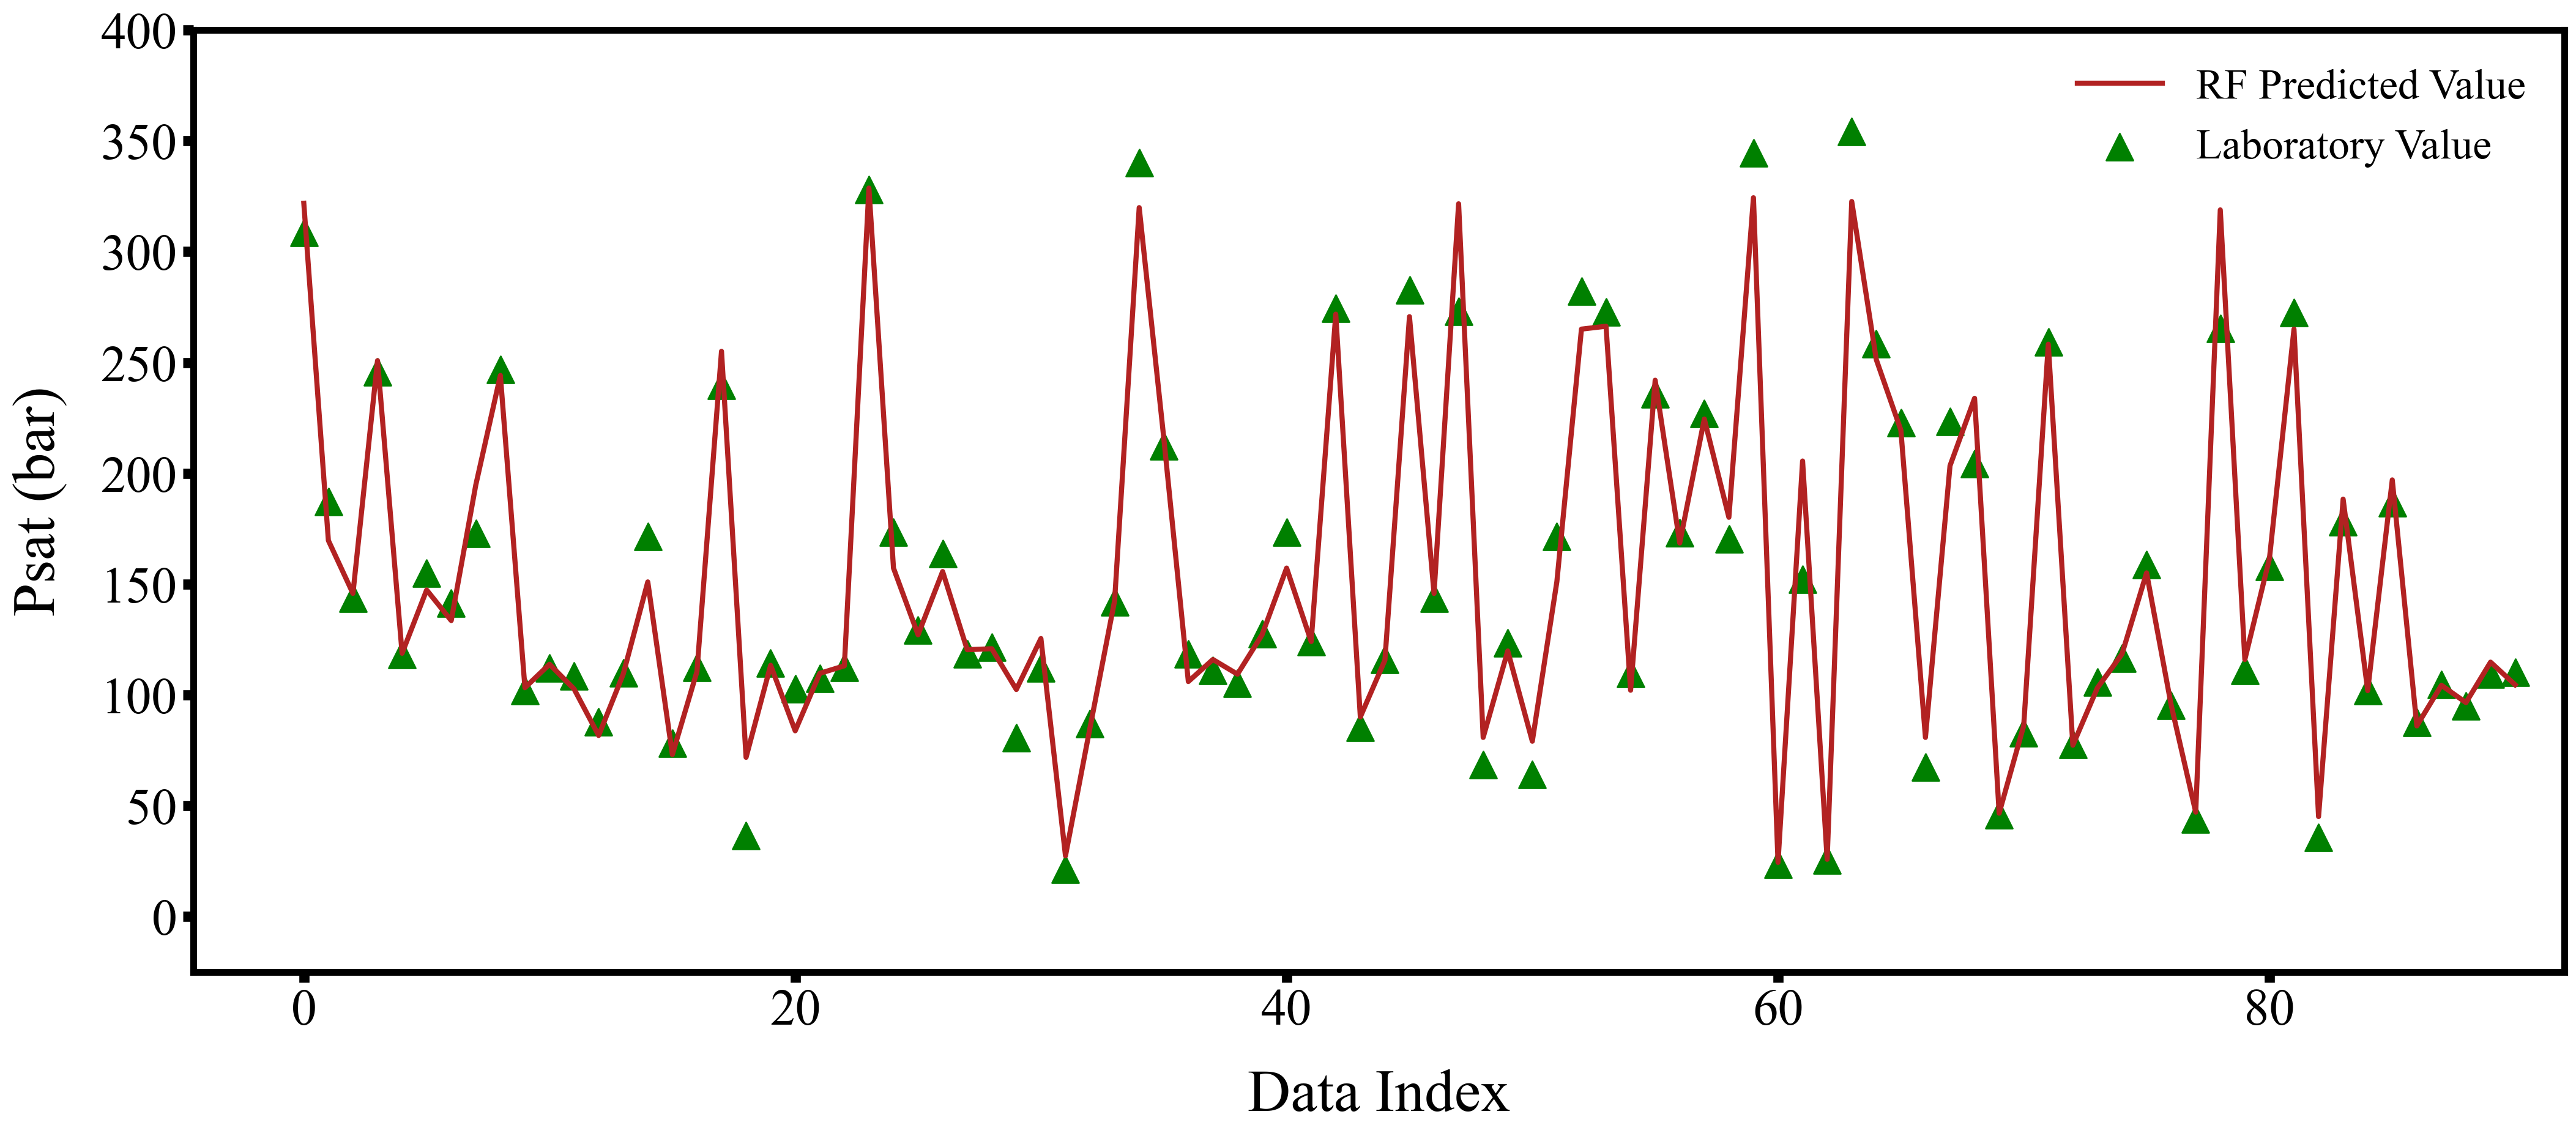

In [82]:
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 6


fig_rf2 = plt.figure(figsize = (25,10) , dpi = 200)
plt.scatter(rf_plot_result.index ,rf_plot_result[["Psat (test)"]] , marker = "^" , s = 250 , c = "green",label = "Laboratory Value")
#plt.plot(rf_plot_result.index ,rf_plot_result[["Psat (test)"]] ,lw = 3 , c = "green" , label = "Laboratory Value")

plt.plot(rf_plot_result.index ,rf_plot_result[["Predicted Psat (test)"]] ,lw = 3 , c = "firebrick",label = "RF Predicted Value")

plt.legend(fontsize = 25,frameon=False)
plt.xlabel("Data Index" , fontsize = 35, labelpad = 20)
plt.ylabel("Psat (bar)",fontsize = 35, labelpad = 20)
plt.xlim(None,92)
plt.ylim(-25,400)

#Defining axis of graph and increasing width of boarder of box
ax = fig_rf2.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(4)


fig_rf2.savefig(figure_path + "rf_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
fig_rf2.savefig(tif_figure + "rf_line.tif" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

#### 3. knn GRAPH

<ipython-input-83-e244c0206c39>:27: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_knn2.savefig(figure_path + "knn_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-83-e244c0206c39>:27: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_knn2.savefig(figure_path + "knn_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-83-e244c0206c39>:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_knn2.savefig(tif_figure + 

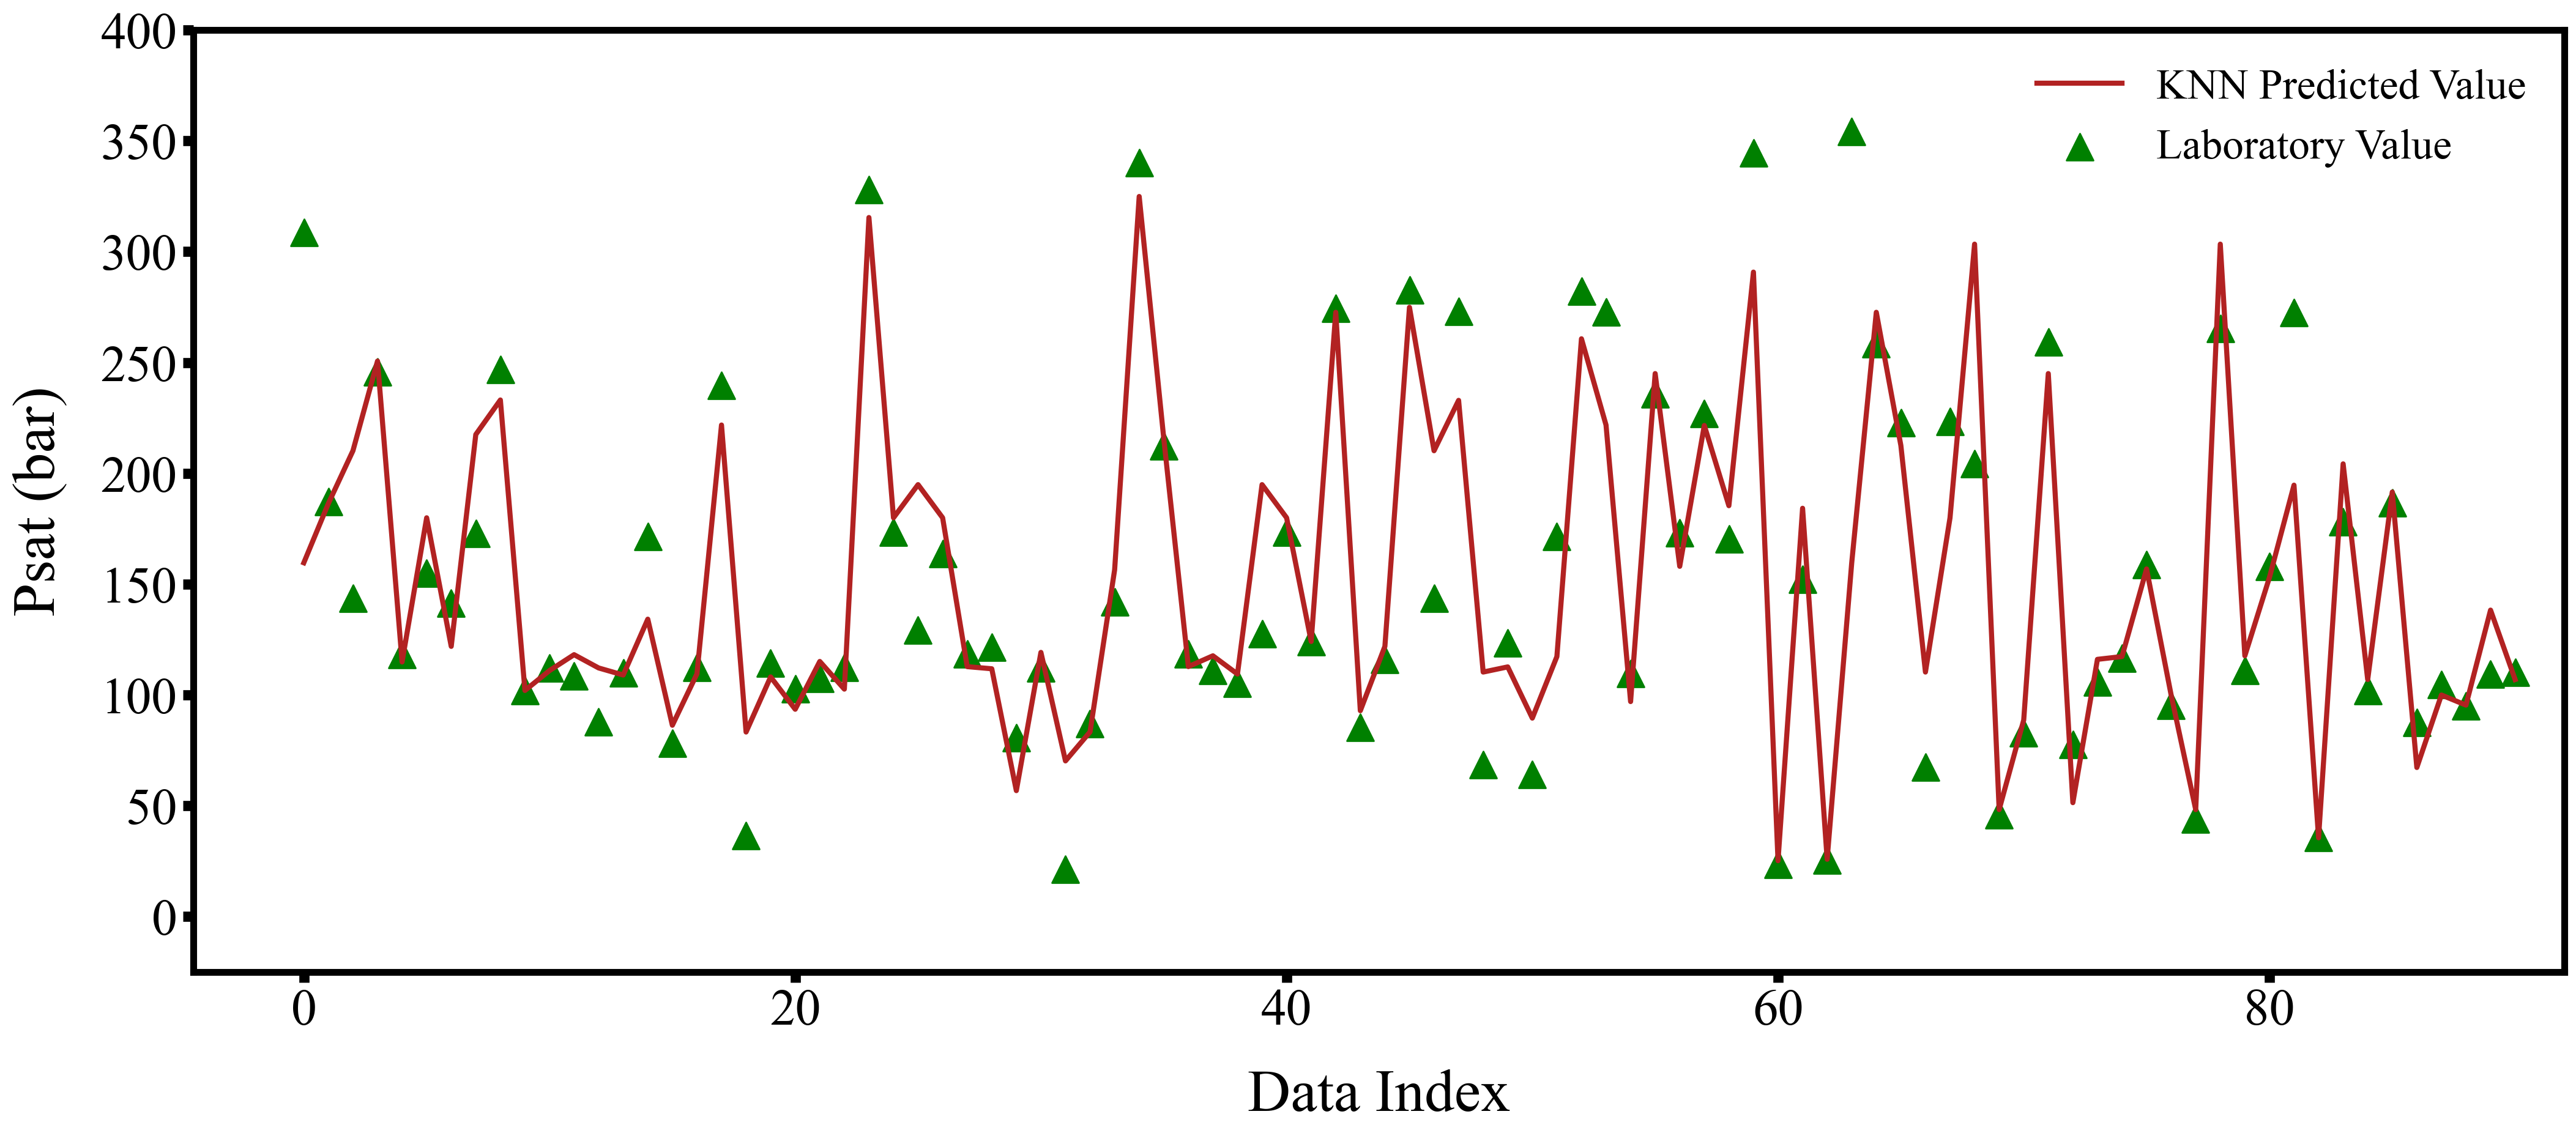

In [83]:
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 6


fig_knn2 = plt.figure(figsize = (25,10) , dpi = 200)
plt.scatter(knn_plot_result.index ,knn_plot_result[["Psat (test)"]] , marker = "^" , s = 250 , c = "green",label = "Laboratory Value")
#plt.plot(knn_plot_result.index ,knn_plot_result[["Psat (test)"]] ,lw = 3 , c = "green" , label = "Laboratory Value")

plt.plot(knn_plot_result.index ,knn_plot_result[["Predicted Psat (test)"]] ,lw = 3 , c = "firebrick",label = "KNN Predicted Value")

plt.legend(fontsize = 25,frameon=False)
plt.xlabel("Data Index" , fontsize = 35, labelpad = 20)
plt.ylabel("Psat (bar)",fontsize = 35, labelpad = 20)
plt.xlim(None,92)
plt.ylim(-25,400)

#Defining axis of graph and increasing width of boarder of box
ax = fig_knn2.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(4)

fig_knn2.savefig(figure_path + "knn_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
fig_knn2.savefig(tif_figure + "knn_line.tif" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


#### 5. Ann GRAPH

<ipython-input-86-4682d8be0def>:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_ann2.savefig(figure_path + "ann_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-86-4682d8be0def>:28: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_ann2.savefig(figure_path + "ann_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-86-4682d8be0def>:29: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_ann2.savefig(tif_figure + 

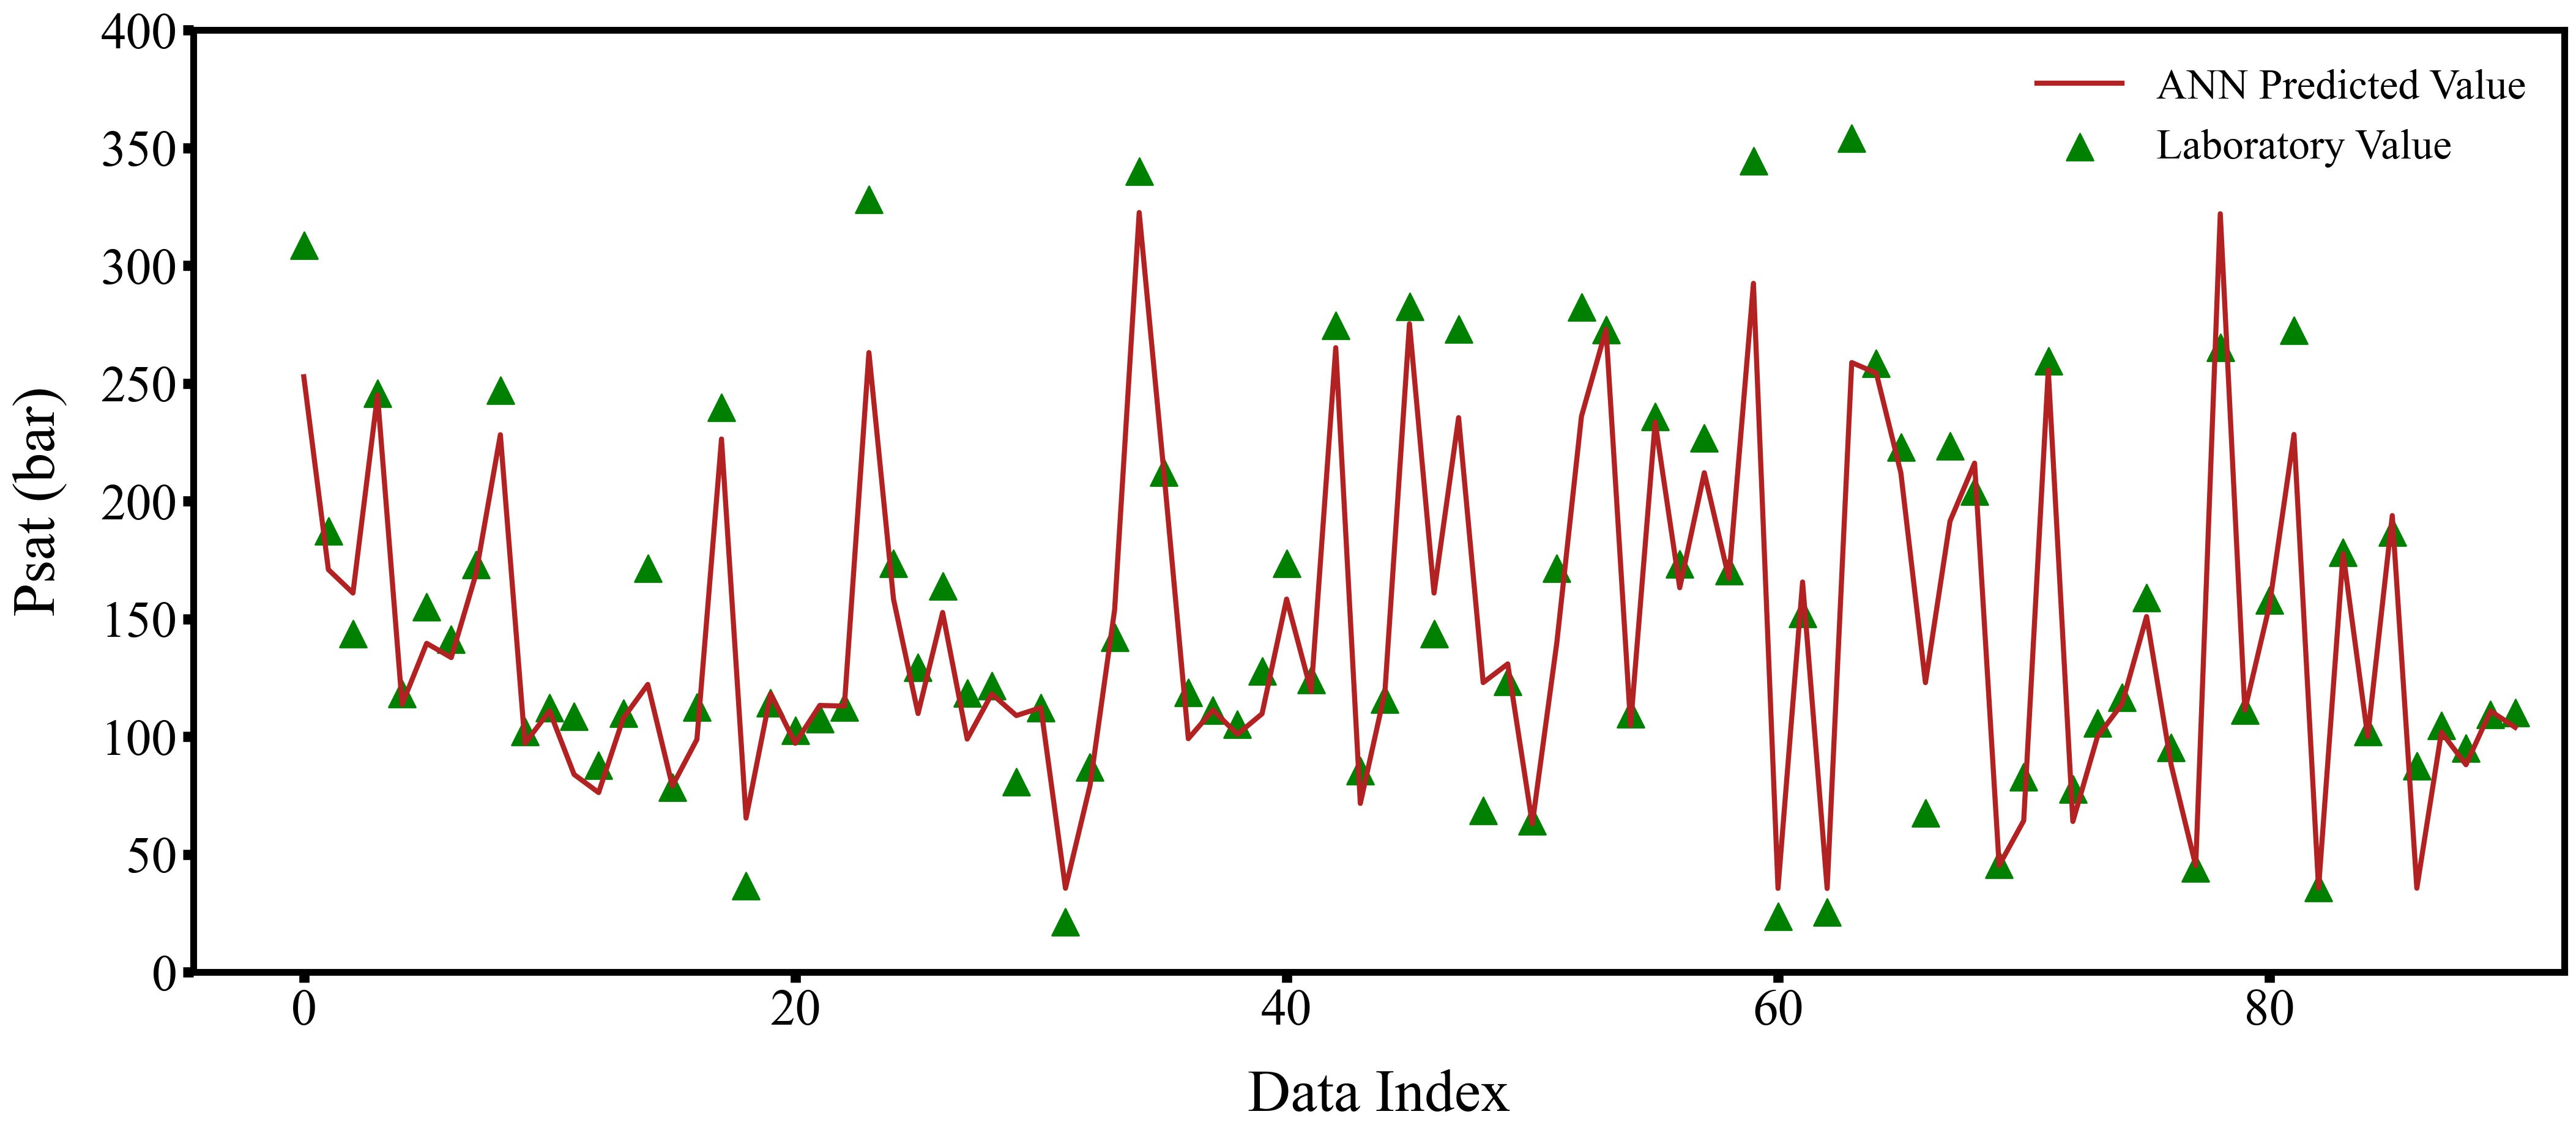

In [86]:
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 6


fig_ann2 = plt.figure(figsize = (25,10) , dpi = 200)
plt.scatter(ann_plot_result.index ,ann_plot_result[["Psat (test)"]] , marker = "^" , s = 250 , c = "green",label = "Laboratory Value")
#plt.plot(ann_plot_result.index ,ann_plot_result[["Psat (test)"]] ,lw = 3 , c = "green" , label = "Laboratory Value")

plt.plot(ann_plot_result.index ,ann_plot_result[["Predicted Psat (test)"]] ,lw = 3 , c = "firebrick",label = "ANN Predicted Value")

plt.legend(fontsize = 25,frameon=False)
plt.xlabel("Data Index" , fontsize = 35, labelpad = 20)
plt.ylabel("Psat (bar)",fontsize = 35, labelpad = 20)
plt.xlim(None,92)
plt.ylim(0,400)

#Defining axis of graph and increasing width of boarder of box
ax = fig_ann2.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(4)


fig_ann2.savefig(figure_path + "ann_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
fig_ann2.savefig(tif_figure + "ann_line.tif" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


#### 6. XGB GRAPH

<ipython-input-88-4120fcc2daef>:27: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_xgb2.savefig(figure_path + "xgb_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-88-4120fcc2daef>:27: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_xgb2.savefig(figure_path + "xgb_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-88-4120fcc2daef>:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_xgb2.savefig(tif_figure + 

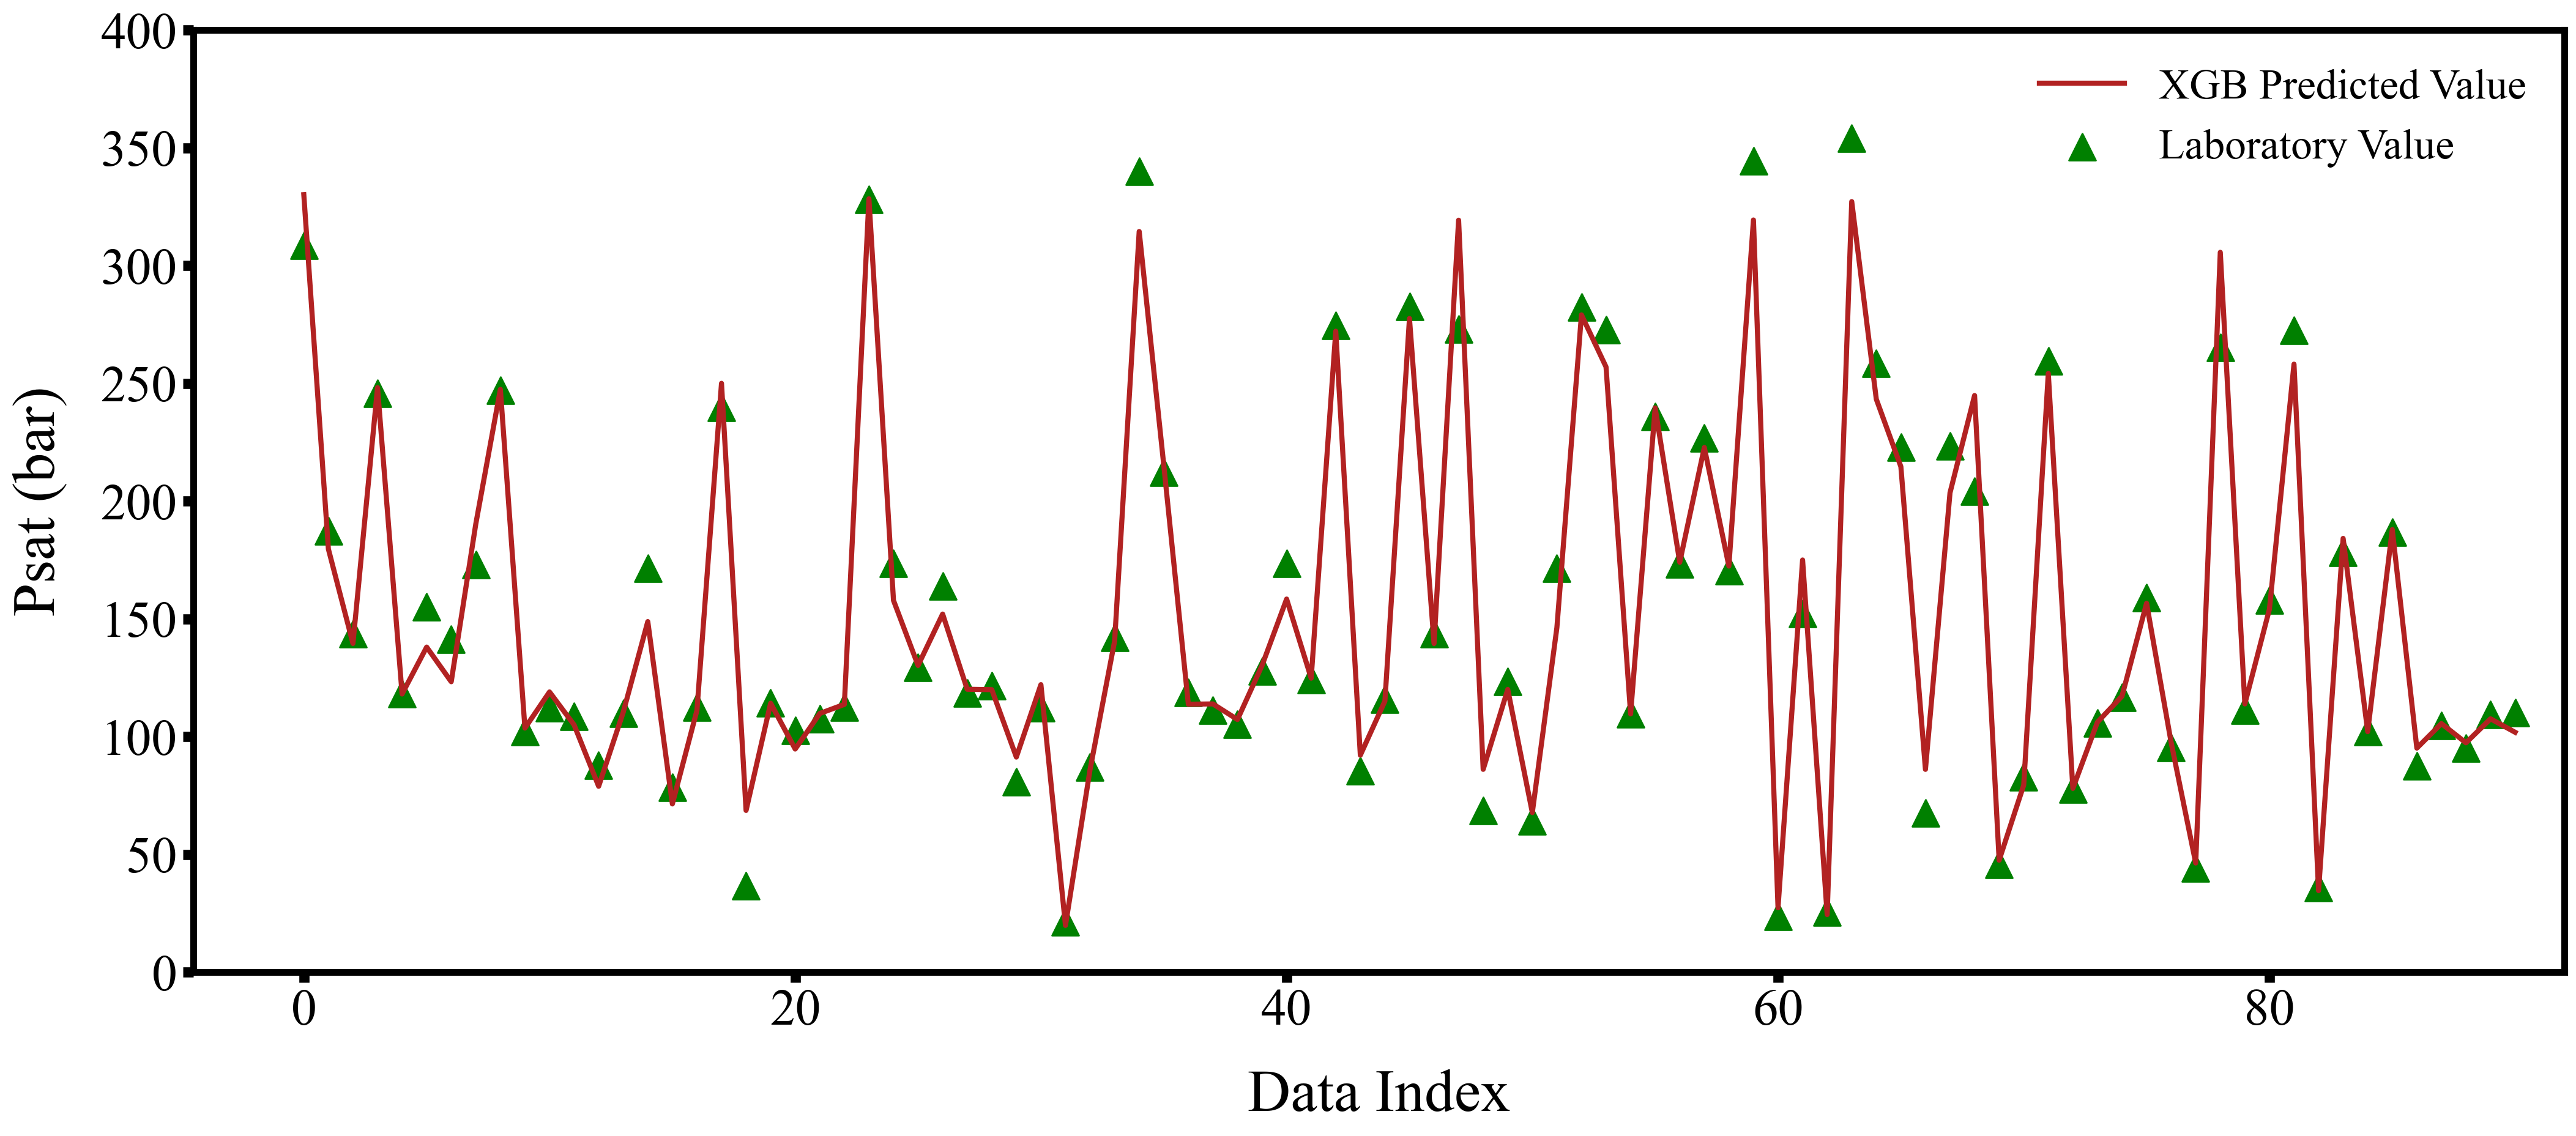

In [88]:
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 6


fig_xgb2 = plt.figure(figsize = (25,10) , dpi = 200)
plt.scatter(xgb_plot_result.index ,xgb_plot_result[["Psat (test)"]] , marker = "^" , s = 250 , c = "green",label = "Laboratory Value")
#plt.plot(xgb_plot_result.index ,xgb_plot_result[["Psat (test)"]] ,lw = 3 , c = "green" , label = "Laboratory Value")

plt.plot(xgb_plot_result.index ,xgb_plot_result[["Predicted Psat (test)"]] ,lw = 3 , c = "firebrick",label = "XGB Predicted Value")

plt.legend(fontsize = 25,frameon=False)
plt.xlabel("Data Index" , fontsize = 35, labelpad = 20)
plt.ylabel("Psat (bar)",fontsize = 35, labelpad = 20)
plt.xlim(None,92)
plt.ylim(0,400)

#Defining axis of graph and increasing width of boarder of box
ax = fig_xgb2.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(4)

fig_xgb2.savefig(figure_path + "xgb_line.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
fig_xgb2.savefig(tif_figure + "xgb_line.tif" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")



##  SUSPECT DETECTION WITH XG BOOST ALGORITHMS

In [89]:
#However, features which are scalled used here for model so that for this detection standerdise features utilized

#Preparing data with standard features fro train and test
train_outlier = pd.DataFrame(x_train , columns = train.drop("Psat" , axis = 1).columns)
train_outlier["Psat"] = y_train
test_outlier = pd.DataFrame(x_test , columns = test.drop("Psat" , axis = 1).columns)#EXTRACT TRAIN DATA AND PREDICTED VALUES TO FOLLOWING DATASET
test_outlier["Psat"] = y_test


#EXTRACT TEST DATA AND PREDICTED VALUES TO FOLLOWING DATASET
xgb_train_predicted = train_outlier.copy()
xgb_train_predicted["Psat Predicted"] = xgb_regression_train_Prediction

#EXTRACT TEST DATA AND PREDICTED VALUES TO FOLLOWING DATASET
xgb_test_predicted = test_outlier.copy()
xgb_test_predicted["Psat Predicted"] = xgb_regression_test_Prediction

#Appending train data with test dataset and calculating residuals
xgb_overall_predicted = xgb_train_predicted.append(xgb_test_predicted).reset_index(drop = True)
xgb_overall_predicted["Residuals"] = xgb_overall_predicted["Psat"] - xgb_overall_predicted["Psat Predicted"]

#Calculating hat matrix and adding Hat values to dataframe
hat_xgb_hat =  xgb_overall_predicted.drop(["Residuals","Psat","Psat Predicted"],axis = 1)
X = np.matrix(hat_xgb_hat)
T_X = X.T
hat_matrix = np.dot(X,np.dot(np.dot(T_X,X).I,T_X))
xgb_overall_predicted["Hat"] = pd.Series(np.diag(hat_matrix))


#.....................Calculating standard residuals for williams plot .......................................................

#n is number of records and p is dimention of model
n = len(xgb_overall_predicted)
p = x_train.shape[1]

#Calculating df
df = n-p-1

#Calculating sum of squared for Residual Sum error
RSS = np.sum(np.square(xgb_overall_predicted["Residuals"]))

#Calculating residual sum error for standard residuals
RSE = (RSS/df)**0.5

#Caclulating Critical leverage value
H = ((p+1)*3)/n

#Calculating standardize residuals for each feature vector
xgb_overall_predicted["STD Residuals"] = xgb_overall_predicted["Residuals"]/(((1-xgb_overall_predicted["Hat"])**0.5)*RSE)

In [90]:
#Calculating outliers datapoints
outliers = xgb_overall_predicted[(xgb_overall_predicted["STD Residuals"]>3) | (xgb_overall_predicted["STD Residuals"]< -3) | (xgb_overall_predicted["Hat"]<0) | (xgb_overall_predicted["Hat"]> H)]

In [91]:
outliers_Percentage = outliers.shape[0] *100 / xgb_overall_predicted.shape[0]
print("% of data lying outside of thumb rule is : {}  %".format(round(outliers_Percentage,2)))

% of data lying outside of thumb rule is : 7.31  %


#### Preparing Williams plot for XGB

<ipython-input-92-867fed362441>:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_hat.savefig(figure_path + "xgb_hat.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-92-867fed362441>:19: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig_hat.savefig(figure_path + "xgb_hat.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-92-867fed362441>:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig_hat.savefig(tif_figure + "xgb_

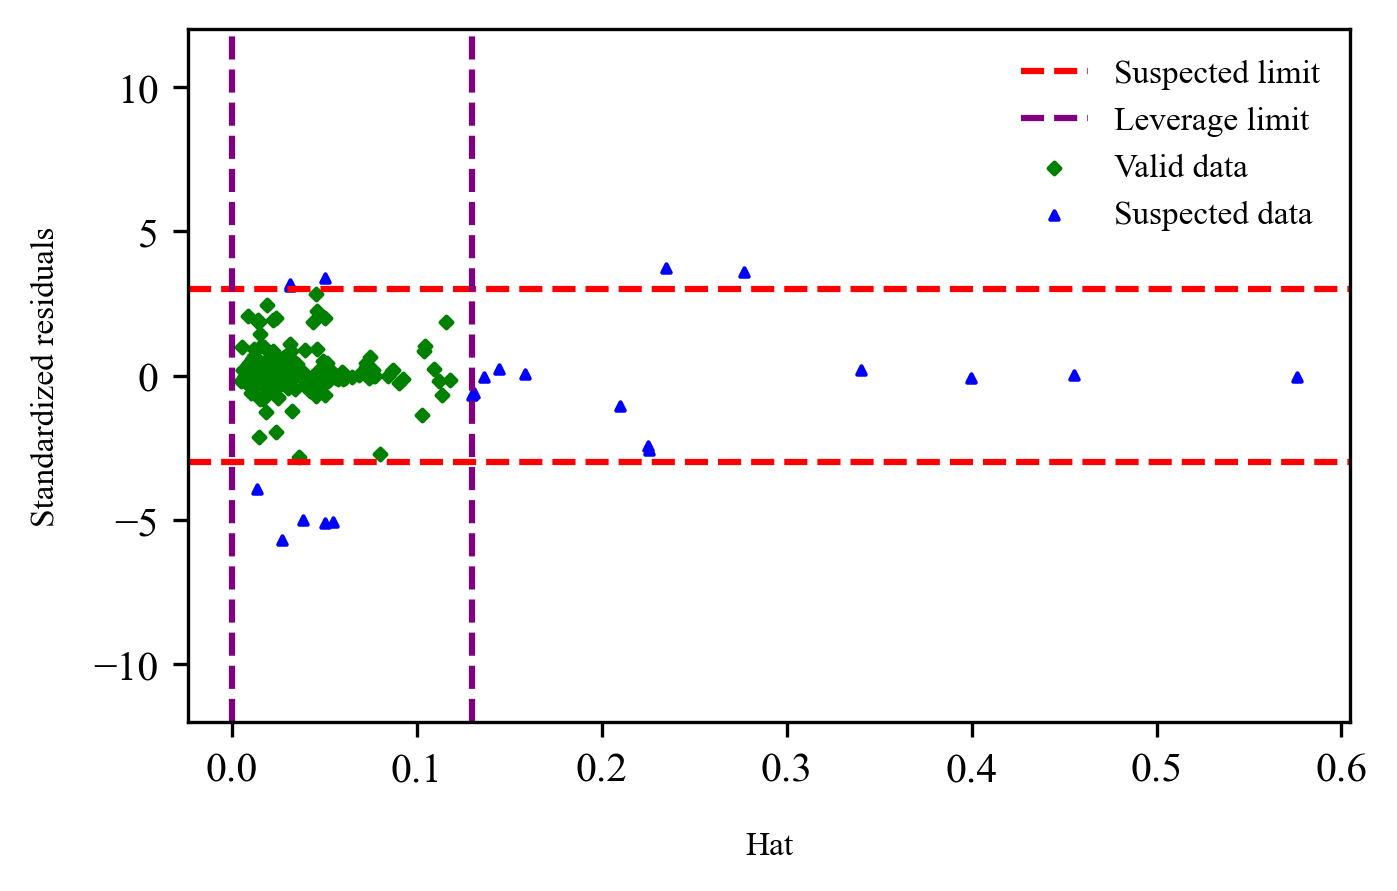

In [92]:
indexs = outliers.index
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"
fig_hat = plt.figure(figsize = (5,3) , dpi = 300)
plt.scatter(xgb_overall_predicted["Hat"].drop(indexs),xgb_overall_predicted["STD Residuals"].drop(indexs), s = 4, marker = "D" , c = "green",label = "Valid data")
plt.scatter(outliers["Hat"],outliers["STD Residuals"], s = 4, c ="blue" , marker = "^" , label = "Suspected data")
plt.axhline(y = 3, color = 'r',ls = "--" , label = "Suspected limit")
plt.axhline(y = -3, color = 'r',ls = "--")
plt.axvline(x = 0, color = 'purple' , ls = "--",label = "Leverage limit")
plt.axvline(x = H, color = 'purple',ls = "--")

plt.legend(fontsize = 8,frameon=False)

plt.xlabel("Hat" , fontsize = 8, labelpad = 10)
plt.ylabel("Standardized residuals",fontsize = 8, labelpad = 8)

plt.ylim((-12,12))

fig_hat.savefig(figure_path + "xgb_hat.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
fig_hat.savefig(tif_figure + "xgb_hat.tif" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


.........................................THE END..........................................................................